# Introducción a Data Science IMT3860
## Proyecto "Análisis de la Correlación entre Desempleo y Salud Mental en Chile (1990 - 2017)"
### Integrantes:
##### Gonzalo Domínguez
##### Carlos Galvez
##### Ordelis Lameda

## Objetivos:
### General: Analizar la posible relación estadística entre la tasa de desempleo y la prevalencia de enfermedades mentales en Chile durante el período 1990–2017.

#### Específicos:
#### 1. Explorar la asociación entre la tasa de desempleo y los distintos tipos de enfermedades mentales reportadas en Chile.
#### 2. Describir las tendencias temporales de la prevalencia de enfermedades mentales y de la tasa de desempleo en Chile.
#### 3. Identificar posibles patrones o comportamientos concurrentes entre las variaciones del desempleo y las enfermedades mentales a lo largo del tiempo.

## Desarrollo metodológico:
##### Objetivo 1:
###### - Análisis de correlación.
###### - Calculo de dispersión.
###### - Análisis descriptivo.
##### Objetivo 2:
###### - Gráfico de serie de tiempo.
##### Objetivo 3:
###### - Visual inspection de los gráficos de tendencia conjunta.
###### - Cruce de tasas anuales de cambio


Primeras 5 filas del dataset:
  Entity Code  Year  Schizophrenia (%)  Bipolar disorder (%)  \
0  Chile  CHL  1990           0.195418              0.773780   
1  Chile  CHL  1991           0.195386              0.774999   
2  Chile  CHL  1992           0.195419              0.776136   
3  Chile  CHL  1993           0.195513              0.777205   
4  Chile  CHL  1994           0.195658              0.778151   

   Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0              0.302799               6.188497                0.971665   
1              0.307654               6.193298                0.950467   
2              0.312015               6.197261                0.934532   
3              0.316493               6.200814                0.922147   
4              0.321115               6.203894                0.916751   

   Depression (%)  Alcohol use disorders (%)  Unemployment Rate (%)  
0        4.401565                   2.204169                   7.62  


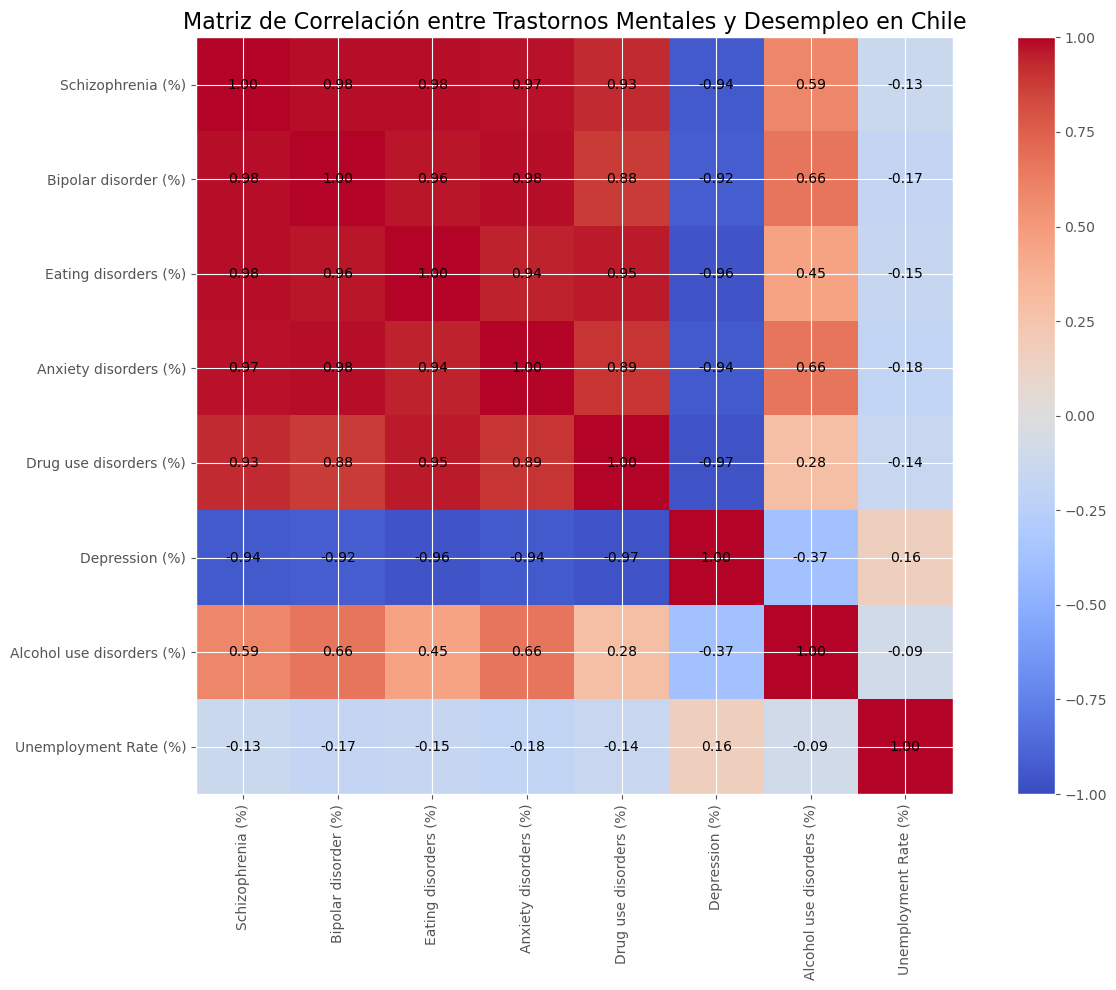


Correlaciones con la tasa de desempleo (ordenadas):
Depression (%)               0.158340
Alcohol use disorders (%)   -0.092263
Schizophrenia (%)           -0.128661
Drug use disorders (%)      -0.141080
Eating disorders (%)        -0.153005
Bipolar disorder (%)        -0.174091
Anxiety disorders (%)       -0.179954
Name: Unemployment Rate (%), dtype: float64


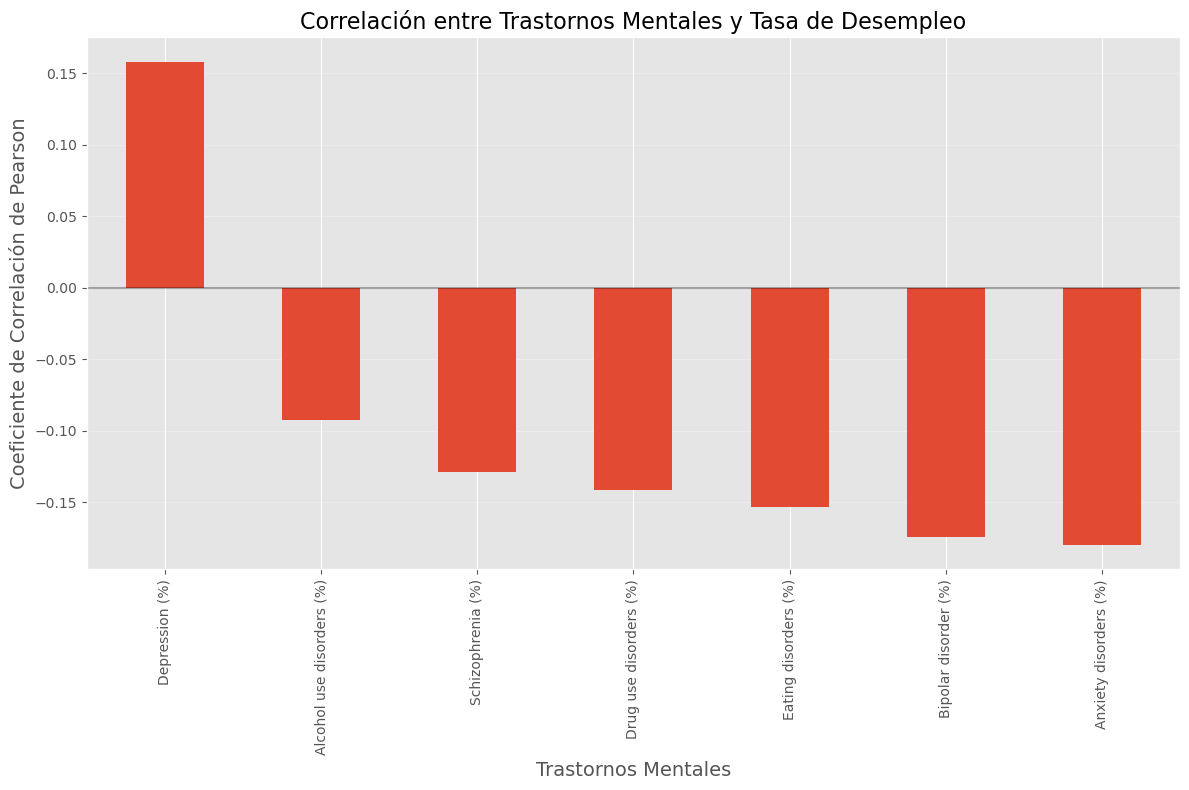


Correlaciones con p-values:
Schizophrenia (%): r = -0.129, p-value = 0.5141
Bipolar disorder (%): r = -0.174, p-value = 0.3756
Eating disorders (%): r = -0.153, p-value = 0.4370
Anxiety disorders (%): r = -0.180, p-value = 0.3595
Drug use disorders (%): r = -0.141, p-value = 0.4739
Depression (%): r = 0.158, p-value = 0.4210
Alcohol use disorders (%): r = -0.092, p-value = 0.6405


In [2]:
# Análisis de Correlación

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('Chile_Mental_Disorder_Empleo.csv')

print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

correlation_matrix = df[numeric_cols].corr()

print("\nMatriz de correlación:")
print(correlation_matrix)

plt.figure(figsize=(14, 10))
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

plt.title('Matriz de Correlación entre Trastornos Mentales y Desempleo en Chile', fontsize=16)
plt.tight_layout()
plt.savefig('correlacion_trastornos_desempleo.png', dpi=300)
plt.show()

unemployment_correlations = correlation_matrix['Unemployment Rate (%)'].drop('Unemployment Rate (%)').sort_values(ascending=False)
print("\nCorrelaciones con la tasa de desempleo (ordenadas):")
print(unemployment_correlations)

plt.figure(figsize=(12, 8))
unemployment_correlations.plot(kind='bar')
plt.title('Correlación entre Trastornos Mentales y Tasa de Desempleo', fontsize=16)
plt.xlabel('Trastornos Mentales', fontsize=14)
plt.ylabel('Coeficiente de Correlación de Pearson', fontsize=14)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('correlacion_barras_desempleo.png', dpi=300)
plt.show()

print("\nCorrelaciones con p-values:")
for disorder in correlation_matrix.index:
    if disorder != 'Unemployment Rate (%)':
        corr, p_value = pearsonr(df[disorder], df['Unemployment Rate (%)'])
        print(f"{disorder}: r = {corr:.3f}, p-value = {p_value:.4f}")

# Interpretación de los resultados del análisis de correlación

Basado en los resultados presentados, podemos hacer la siguiente interpretación:

## 1. Fuerza y dirección de las correlaciones
- **Correlación positiva débil**: Solo la depresión muestra una correlación positiva (r = 0.158) con la tasa de desempleo, lo que sugiere que hay una tendencia muy leve a que cuando aumenta la tasa de desempleo, también aumenta la prevalencia de depresión, y viceversa.
- **Correlaciones negativas débiles**: Los otros trastornos mentales muestran correlaciones negativas débiles con la tasa de desempleo, siendo los trastornos de ansiedad (r = -0.180) y el trastorno bipolar (r = -0.174) los que presentan las correlaciones negativas más fuertes. Esto sugiere una tendencia muy débil a que cuando aumenta el desempleo, disminuye ligeramente la prevalencia de estos trastornos, o viceversa.

## 2. Significancia estadística
Todos los valores p (p-value) son considerablemente mayores que 0.05 (un umbral común para determinar significancia estadística):
- Todos los p-values están en el rango de 0.36 a 0.64
- El valor p más bajo es 0.3595 para trastornos de ansiedad
- Esto indica que ninguna de las correlaciones observadas es estadísticamente significativa

## 3. Conclusiones principales
1. **No hay evidencia estadística de asociación**: Los resultados sugieren que no existe una relación estadísticamente significativa entre la tasa de desempleo y los diferentes trastornos mentales en Chile durante el período analizado.
2. **Tamaño muestral limitado**: Con solo 28 observaciones (años), el poder estadístico es limitado, lo que dificulta detectar correlaciones débiles como estadísticamente significativas.
3. **Correlaciones débiles en general**: Todos los coeficientes de correlación son cercanos a cero (-0.18 a 0.16), indicando relaciones muy débiles independientemente de su dirección.
4. **Posibles factores confusores**: La ausencia de correlaciones significativas podría deberse a que existen otros factores socioeconómicos, culturales o de políticas públicas que influyen en la relación entre desempleo y salud mental.

## 4. Contrastes interesantes
- Es notable que la matriz de correlación muestra fuertes correlaciones entre los distintos trastornos mentales entre sí (valores cercanos a 1 o -1), lo que sugiere patrones interrelacionados en la prevalencia de distintos trastornos mentales.
- La depresión muestra correlaciones negativas muy fuertes con los otros trastornos mentales, lo que podría indicar diferencias en los patrones de diagnóstico o registro de este trastorno específico.

En resumen, este análisis no proporciona evidencia estadística de una relación significativa entre el desempleo y los trastornos mentales en Chile basado en los datos analizados, aunque se observan tendencias débiles que podrían explorarse con conjuntos de datos más amplios o métodos analíticos diferentes.

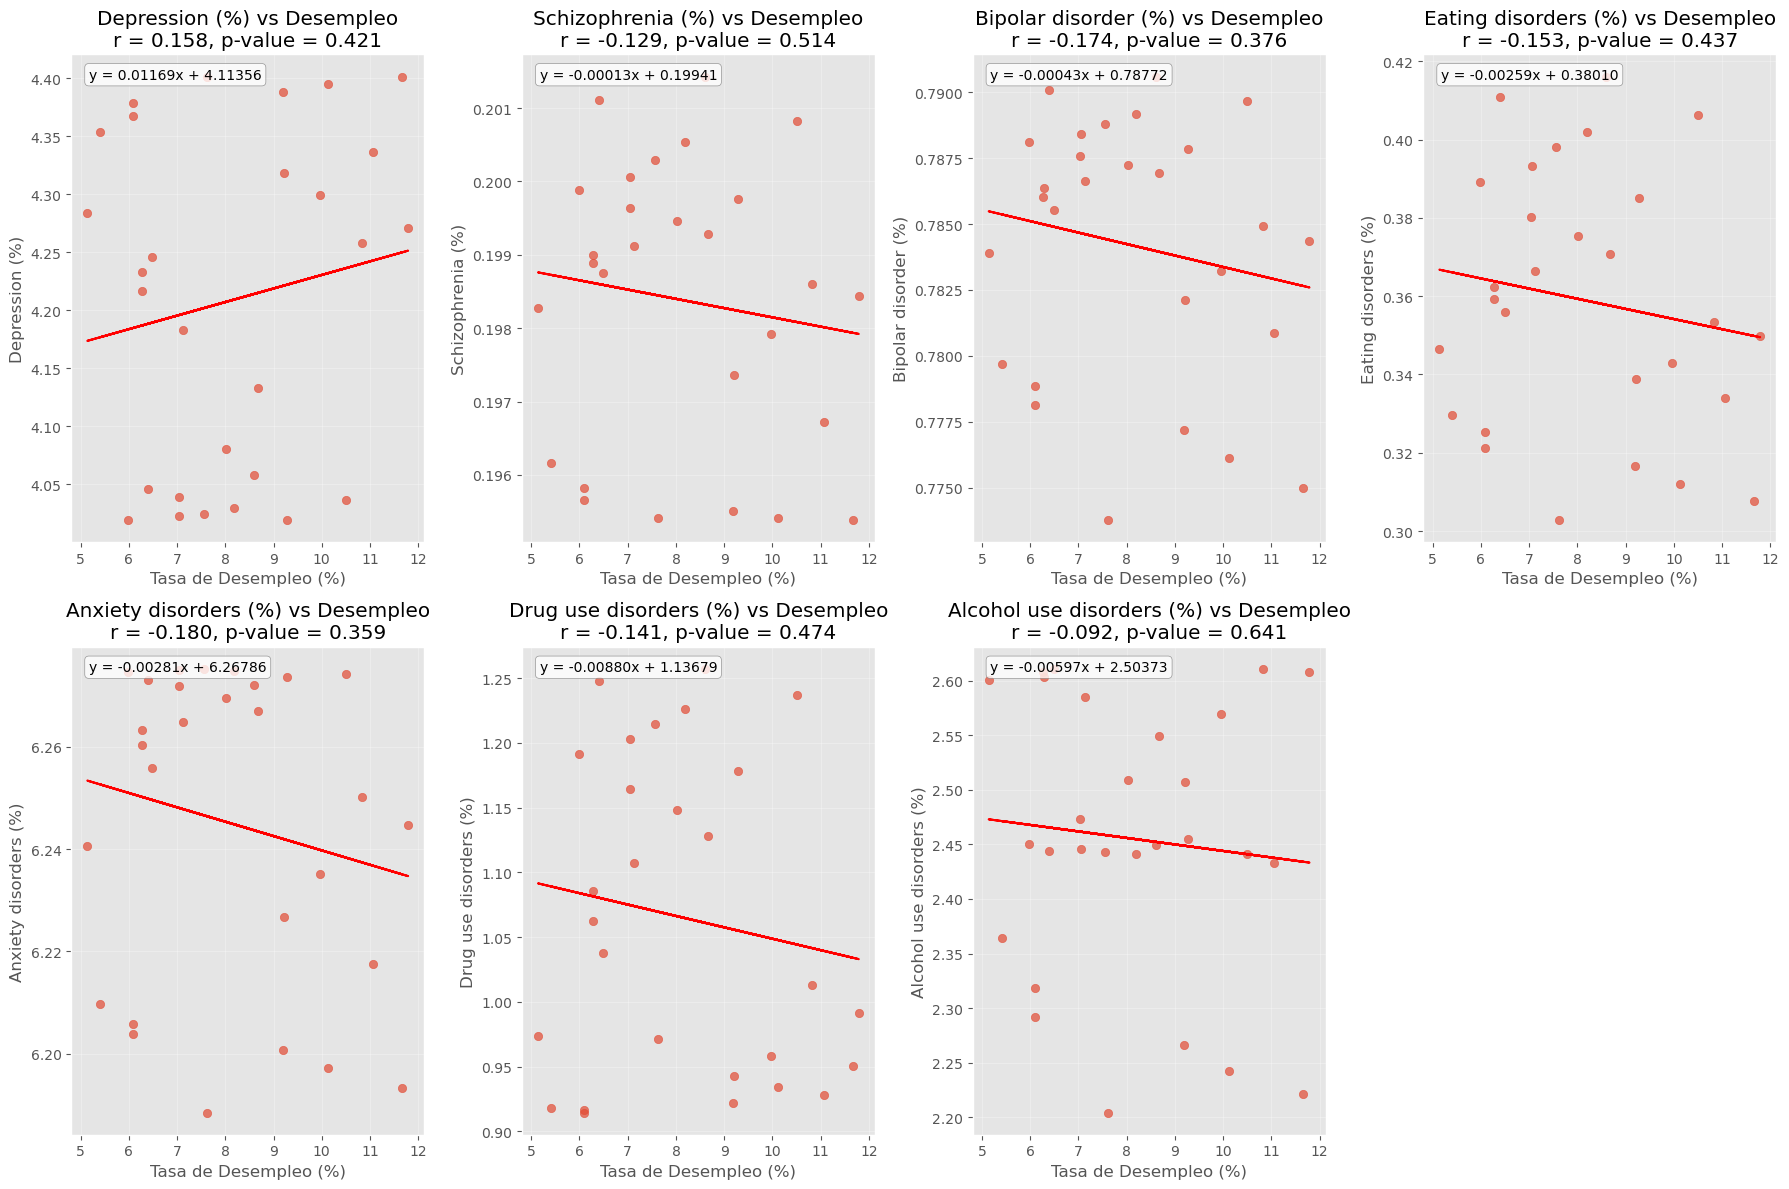

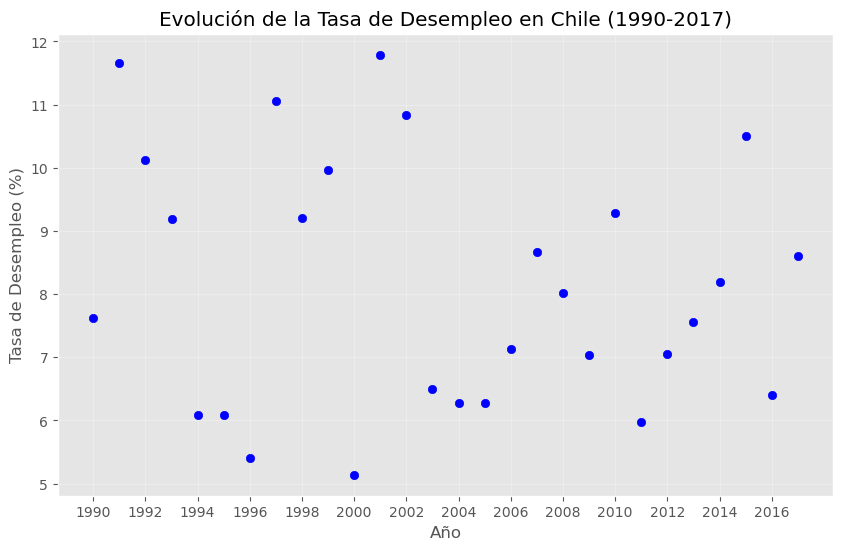

Estadísticas de dispersión (desviación estándar):
Depression (%): 0.145336
Schizophrenia (%): 0.001930
Bipolar disorder (%): 0.004910
Eating disorders (%): 0.033378
Anxiety disorders (%): 0.030725
Drug use disorders (%): 0.122824
Alcohol use disorders (%): 0.127291

Rango de valores para cada variable:
Depression (%): Min = 4.019166, Max = 4.401565, Rango = 0.382399
Schizophrenia (%): Min = 0.195386, Max = 0.201430, Rango = 0.006044
Bipolar disorder (%): Min = 0.773780, Max = 0.790591, Rango = 0.016811
Eating disorders (%): Min = 0.302799, Max = 0.416123, Rango = 0.113324
Anxiety disorders (%): Min = 6.188497, Max = 6.275241, Rango = 0.086744
Drug use disorders (%): Min = 0.914465, Max = 1.257150, Rango = 0.342685
Alcohol use disorders (%): Min = 2.204169, Max = 2.610887, Rango = 0.406718
Unemployment Rate (%): Min = 5.140000, Max = 11.790000, Rango = 6.650000


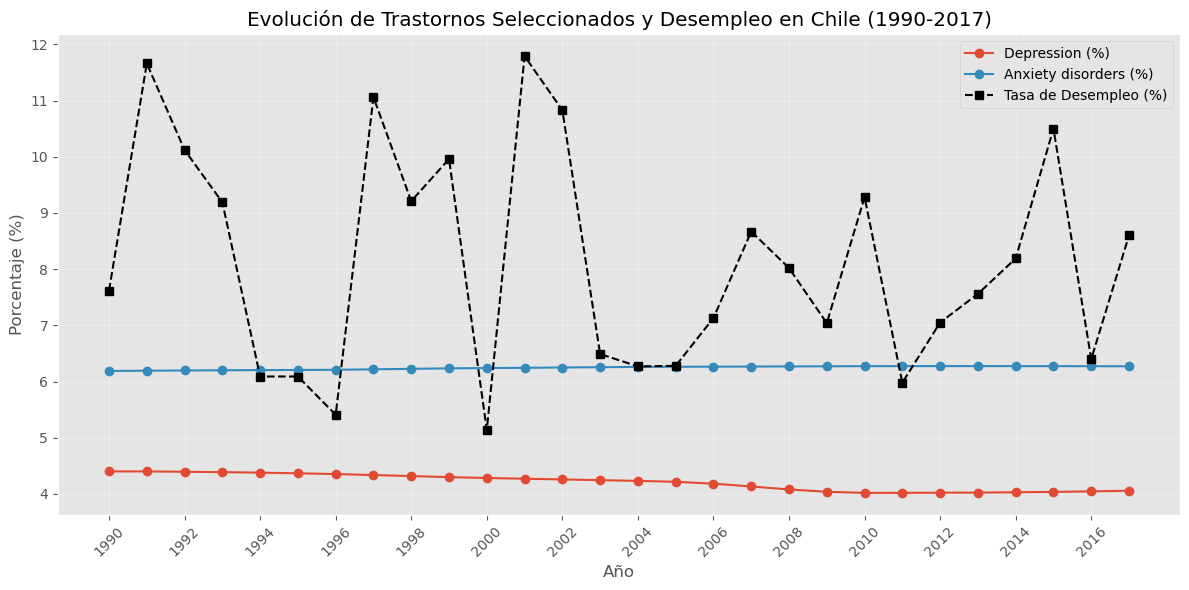


Coeficiente de variación (CV) para cada variable:
Depression (%): 3.45%
Schizophrenia (%): 0.97%
Bipolar disorder (%): 0.63%
Eating disorders (%): 9.30%
Anxiety disorders (%): 0.49%
Drug use disorders (%): 11.53%
Alcohol use disorders (%): 5.18%
Unemployment Rate (%): 24.21%

Variables ordenadas por mayor variabilidad relativa:
Unemployment Rate (%): 24.21%
Drug use disorders (%): 11.53%
Eating disorders (%): 9.30%
Alcohol use disorders (%): 5.18%
Depression (%): 3.45%
Schizophrenia (%): 0.97%
Bipolar disorder (%): 0.63%
Anxiety disorders (%): 0.49%


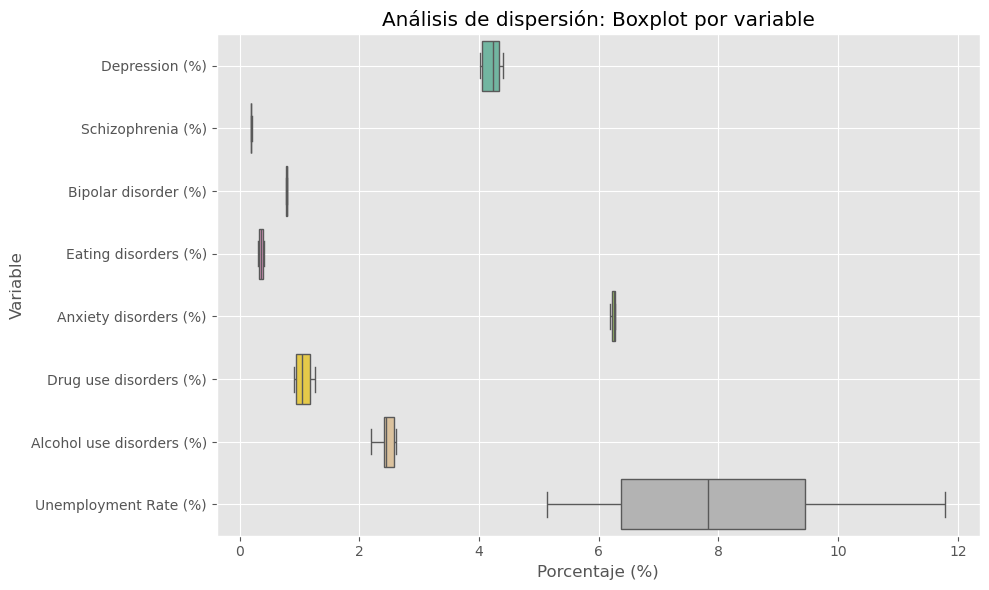

In [5]:
# Cálculo de dispersión

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

df = pd.read_csv('Chile_Mental_Disorder_Empleo.csv')

mental_disorders = ['Depression (%)', 'Schizophrenia (%)', 'Bipolar disorder (%)', 
                    'Eating disorders (%)', 'Anxiety disorders (%)', 
                    'Drug use disorders (%)', 'Alcohol use disorders (%)']

plt.figure(figsize=(18, 12))

for i, disorder in enumerate(mental_disorders):
    plt.subplot(2, 4, i+1)
    
    x = df['Unemployment Rate (%)']
    y = df[disorder]
    
    corr, p_value = pearsonr(x, y)
    
    plt.scatter(x, y, alpha=0.7)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red')
    
    plt.title(f'{disorder} vs Desempleo\nr = {corr:.3f}, p-value = {p_value:.3f}')
    plt.xlabel('Tasa de Desempleo (%)')
    plt.ylabel(disorder)
    plt.grid(True, alpha=0.3)
    
    plt.annotate(f'y = {m:.5f}x + {b:.5f}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction', 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('dispersion_trastornos_desempleo.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Unemployment Rate (%)'], c='blue', label='Tasa de Desempleo')
plt.grid(True, alpha=0.3)
plt.title('Evolución de la Tasa de Desempleo en Chile (1990-2017)')
plt.xlabel('Año')
plt.ylabel('Tasa de Desempleo (%)')
plt.xticks(df['Year'][::2])
plt.savefig('evolucion_desempleo.png', dpi=300)
plt.show()

print("Estadísticas de dispersión (desviación estándar):")
for disorder in mental_disorders:
    std_dev = df[disorder].std()
    print(f"{disorder}: {std_dev:.6f}")

print("\nRango de valores para cada variable:")
for disorder in mental_disorders + ['Unemployment Rate (%)']:
    min_val = df[disorder].min()
    max_val = df[disorder].max()
    range_val = max_val - min_val
    print(f"{disorder}: Min = {min_val:.6f}, Max = {max_val:.6f}, Rango = {range_val:.6f}")

plt.figure(figsize=(12, 6))
selected_disorders = ['Depression (%)', 'Anxiety disorders (%)']

for disorder in selected_disorders:
    plt.plot(df['Year'], df[disorder], marker='o', label=disorder)

plt.plot(df['Year'], df['Unemployment Rate (%)'], marker='s', linestyle='--', color='black', label='Tasa de Desempleo (%)')
plt.grid(True, alpha=0.3)
plt.title('Evolución de Trastornos Seleccionados y Desempleo en Chile (1990-2017)')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(df['Year'][::2], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('evolucion_trastornos_desempleo.png', dpi=300)
plt.show()

cv_results = {}
print("\nCoeficiente de variación (CV) para cada variable:")
for disorder in mental_disorders + ['Unemployment Rate (%)']:
    mean_val = df[disorder].mean()
    std_val = df[disorder].std()
    cv = (std_val / mean_val) * 100
    cv_results[disorder] = cv
    print(f"{disorder}: {cv:.2f}%")

sorted_cv = sorted(cv_results.items(), key=lambda x: x[1], reverse=True)
print("\nVariables ordenadas por mayor variabilidad relativa:")
for disorder, cv in sorted_cv:
    print(f"{disorder}: {cv:.2f}%")

# Seleccionar solo las columnas numéricas de interés
variables_numericas = [
    "Depression (%)", "Schizophrenia (%)", "Bipolar disorder (%)",
    "Eating disorders (%)", "Anxiety disorders (%)",
    "Drug use disorders (%)", "Alcohol use disorders (%)",
    "Unemployment Rate (%)"
]

# Crear diagramas de caja (boxplots) para ver la dispersión
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[variables_numericas], orient="h", palette="Set2")
plt.title("Análisis de dispersión: Boxplot por variable")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Variable")
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretación de los Resultados del Análisis de Dispersión
## 1. Gráficos de Dispersión (Imagen 1)
Los gráficos de dispersión confirman la ausencia de relaciones claras entre la tasa de desempleo y los trastornos mentales:

Depresión: Muestra una ligera tendencia positiva (r = 0.158, p = 0.421), pero la dispersión de los puntos es muy amplia alrededor de la línea de regresión, indicando una relación débil y no significativa.
Trastornos de ansiedad y bipolar: Presentan las correlaciones negativas más fuertes (r = -0.180 y r = -0.174 respectivamente), pero siguen siendo débiles y no significativas (p > 0.05).
Pendientes de regresión: Todas las pendientes son muy cercanas a cero, lo que confirma el efecto limitado del desempleo sobre la prevalencia de los trastornos. Por ejemplo, para la depresión, un aumento de 1% en desempleo se asocia con un incremento de solo 0.012% en la prevalencia de la depresión.

## 2. Evolución Temporal (Imágenes 2 y 3)

Tasa de desempleo: Muestra una alta volatilidad a lo largo del período 1990-2017, con picos claros en 1992, 2001 y 2009, posiblemente relacionados con crisis económicas.
Estabilidad de los trastornos mentales: En contraste, la prevalencia de trastornos como depresión y ansiedad muestra patrones muy estables a lo largo del tiempo, con tendencias suaves y cambios graduales.
Desconexión visual: El gráfico de evolución (Imagen 3) muestra claramente que las fluctuaciones en el desempleo ocurren independientemente de las tendencias en salud mental, que siguen trayectorias mucho más estables.

## 3. Estadísticas de Dispersión (Imagen 4)

Desviación estándar: La mayor variabilidad absoluta se observa en Depresión (0.145) y trastornos por uso de alcohol (0.127) y drogas (0.123).
Rangos: El desempleo muestra, por mucho, el mayor rango (6.65 puntos porcentuales), variando entre 5.14% y 11.79%, mientras que los trastornos mentales presentan rangos mucho más pequeños (entre 0.017 y 0.382 puntos porcentuales).

## 4. Coeficiente de Variación (Imagen 5)
Este es quizás el hallazgo más revelador:

Desempleo: Tiene un CV de 24.21%, lo que indica una alta variabilidad relativa a su media.
Trastornos mentales: Presentan CVs mucho menores:

Trastornos por uso de drogas: 11.53%
Trastornos de la alimentación: 9.30%
Trastornos por uso de alcohol: 5.18%
Depresión: 3.45%
Esquizofrenia: 0.97%
Trastorno bipolar: 0.63%
Trastornos de ansiedad: 0.49%

## Conclusiones Integrales

Diferencia fundamental en variabilidad: El desempleo muestra una variabilidad relativa (CV) aproximadamente 2-50 veces mayor que los trastornos mentales. Esto sugiere que mientras la tasa de desempleo fluctúa considerablemente con los ciclos económicos, la prevalencia de trastornos mentales permanece relativamente estable en la población.
Naturaleza de las variables: Esta diferencia en variabilidad podría explicar la ausencia de correlaciones significativas. Los trastornos mentales, particularmente aquellos con componentes biológicos importantes como esquizofrenia y trastorno bipolar (con CVs < 1%), muestran cambios muy graduales que no responden a fluctuaciones económicas a corto plazo.
Posible efecto retardado: El análisis actual examina relaciones contemporáneas, pero es posible que existan efectos retardados (lag effects) donde los impactos del desempleo en la salud mental se manifiesten años después.
Limitaciones metodológicas: Los datos agregados a nivel país pueden ocultar relaciones que serían visibles a nivel individual. Es posible que existan asociaciones significativas a nivel individual que se diluyen al analizar datos poblacionales.
Factores protectores: La estabilidad en la prevalencia de trastornos mentales frente a fluctuaciones económicas podría indicar la presencia de factores protectores en Chile, como sistemas de protección social, redes de apoyo familiar o intervenciones en salud mental que mitigan el impacto del desempleo.

En conclusión, este análisis de dispersión refuerza los hallazgos del análisis de correlación, demostrando que en Chile, durante el período estudiado, no hay evidencia de una relación estadísticamente significativa entre las fluctuaciones en la tasa de desempleo y la prevalencia de trastornos mentales a nivel poblacional. La gran diferencia en variabilidad entre estas variables sugiere que operan bajo dinámicas temporales distintas.

1. RESUMEN ESTADÍSTICO BÁSICO
--------------------------------------------------
                           count         mean       std          min  \
Year                        28.0  2003.500000  8.225975  1990.000000   
Schizophrenia (%)           28.0     0.198384  0.001930     0.195386   
Bipolar disorder (%)        28.0     0.784185  0.004910     0.773780   
Eating disorders (%)        28.0     0.359009  0.033378     0.302799   
Anxiety disorders (%)       28.0     6.245018  0.030725     6.188497   
Drug use disorders (%)      28.0     1.065216  0.122824     0.914465   
Depression (%)              28.0     4.208620  0.145336     4.019166   
Alcohol use disorders (%)   28.0     2.455217  0.127291     2.204169   
Unemployment Rate (%)       28.0     8.129643  1.968138     5.140000   

                                   25%          50%          75%          max  
Year                       1996.750000  2003.500000  2010.250000  2017.000000  
Schizophrenia (%)             0.196584

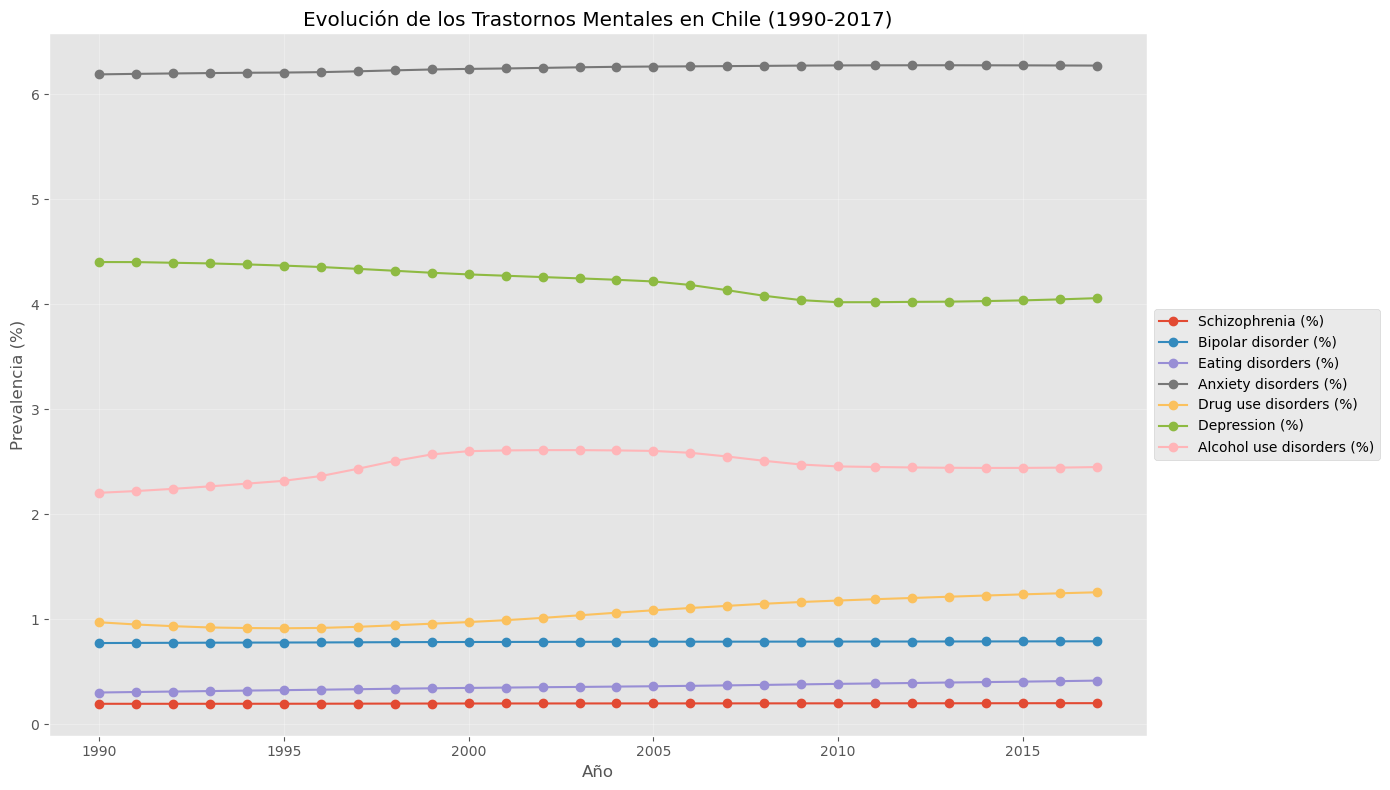


4. ANÁLISIS DE DISTRIBUCIÓN
--------------------------------------------------


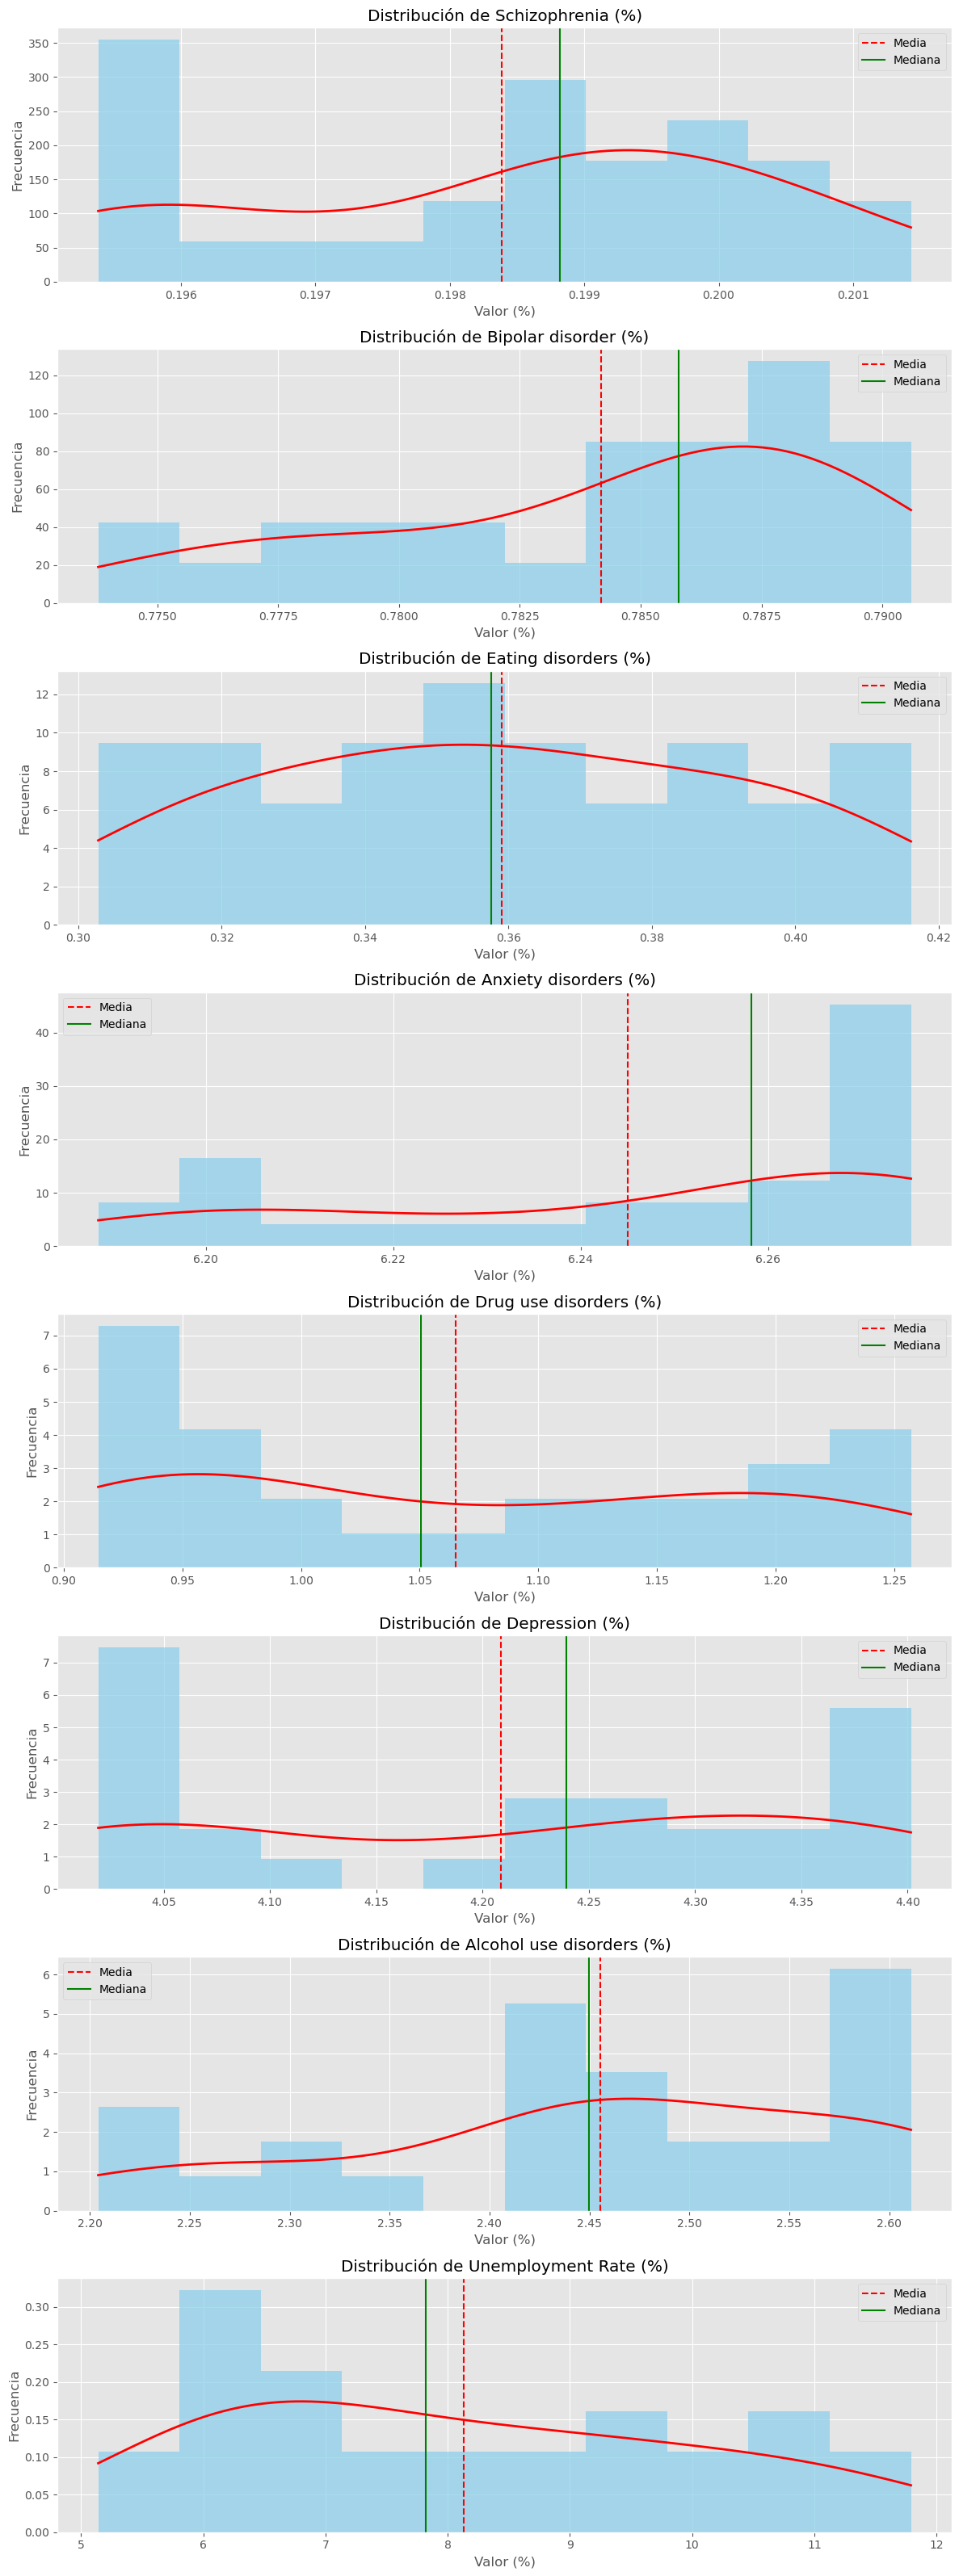


5. ANÁLISIS DE BOXPLOTS
--------------------------------------------------


C:\Users\carga\AppData\Local\Temp\ipykernel_23636\2246934883.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in mental_cols], labels=mental_cols)


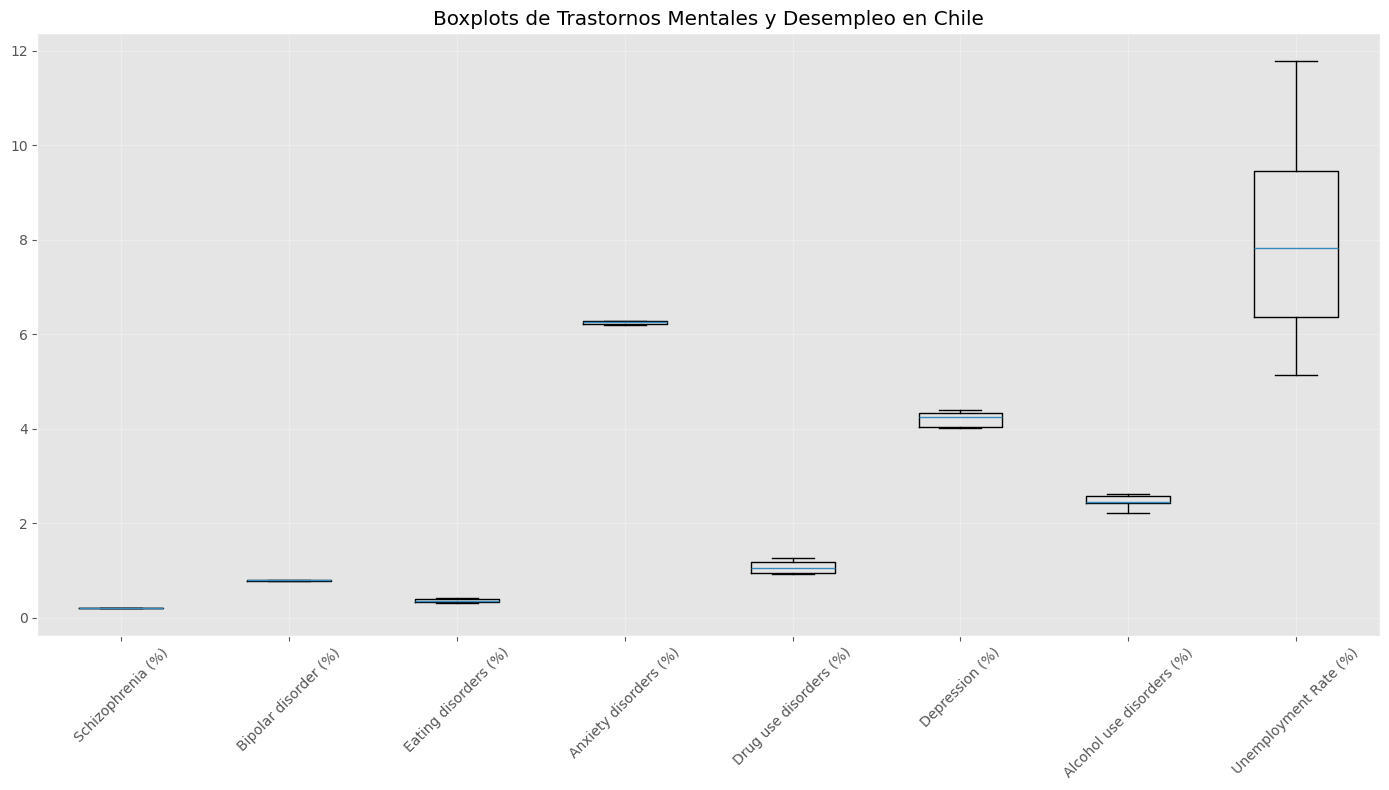


6. COMPARACIÓN DE VARIABILIDAD NORMALIZADA
--------------------------------------------------


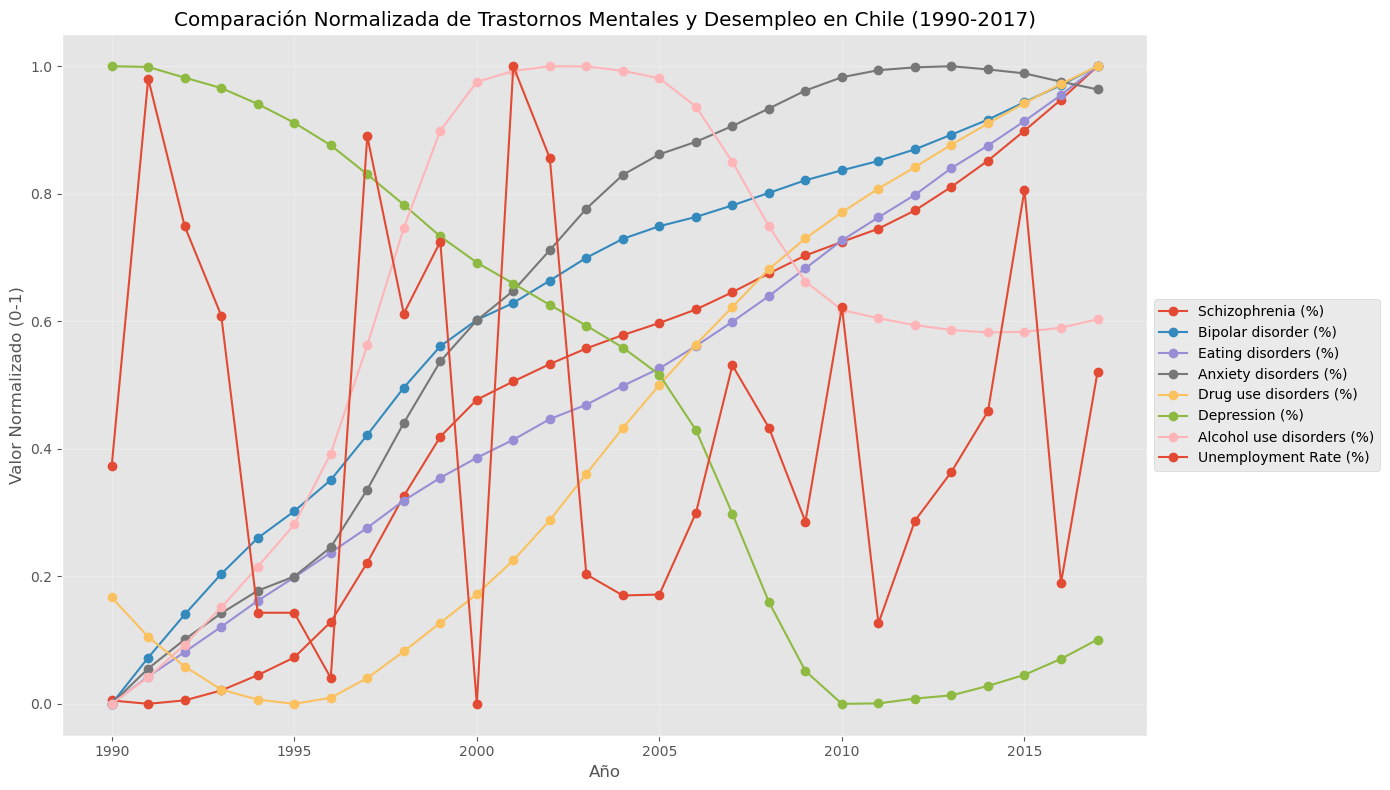


7. ANÁLISIS DE PREVALENCIA PROMEDIO
--------------------------------------------------


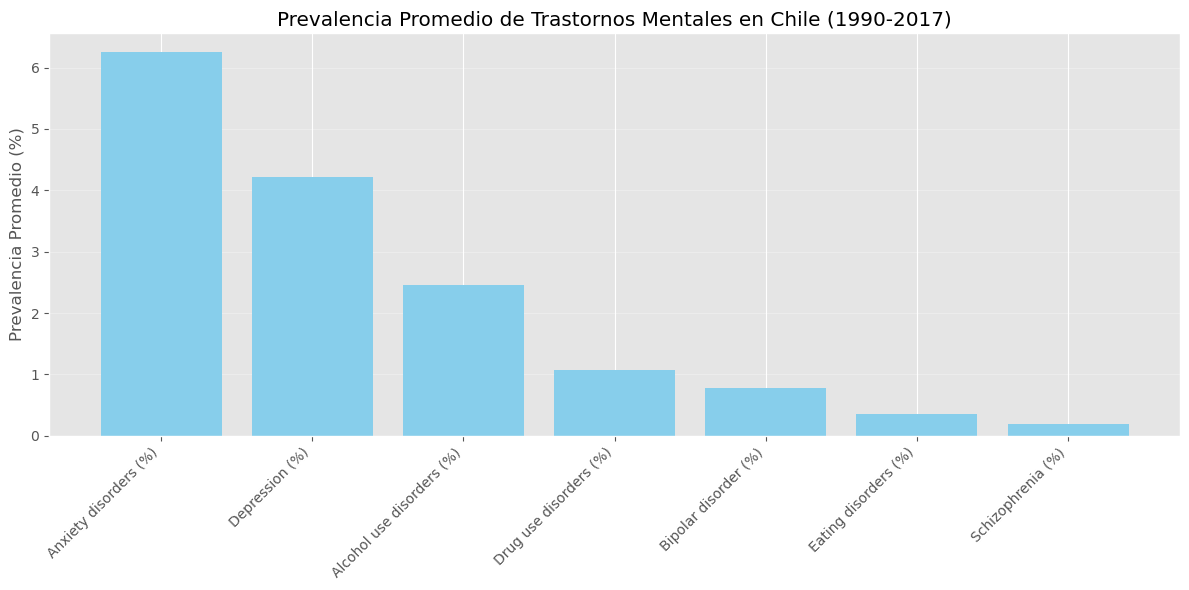

Anxiety disorders (%): 6.2450%
Depression (%): 4.2086%
Alcohol use disorders (%): 2.4552%
Drug use disorders (%): 1.0652%
Bipolar disorder (%): 0.7842%
Eating disorders (%): 0.3590%
Schizophrenia (%): 0.1984%

8. ANÁLISIS DE CUARTILES
--------------------------------------------------

Schizophrenia (%):
Q1 (25%): 0.1966
Q2 (50% - Mediana): 0.1988
Q3 (75%): 0.1998
IQR (Rango Intercuartil): 0.0032
Límite inferior (para outliers): 0.1918
Límite superior (para outliers): 0.2046

Bipolar disorder (%):
Q1 (25%): 0.7806
Q2 (50% - Mediana): 0.7858
Q3 (75%): 0.7879
IQR (Rango Intercuartil): 0.0073
Límite inferior (para outliers): 0.7696
Límite superior (para outliers): 0.7989

Eating disorders (%):
Q1 (25%): 0.3330
Q2 (50% - Mediana): 0.3576
Q3 (75%): 0.3862
IQR (Rango Intercuartil): 0.0532
Límite inferior (para outliers): 0.2532
Límite superior (para outliers): 0.4660

Anxiety disorders (%):
Q1 (25%): 6.2157
Q2 (50% - Mediana): 6.2582
Q3 (75%): 6.2723
IQR (Rango Intercuartil): 0.0567
Límite i

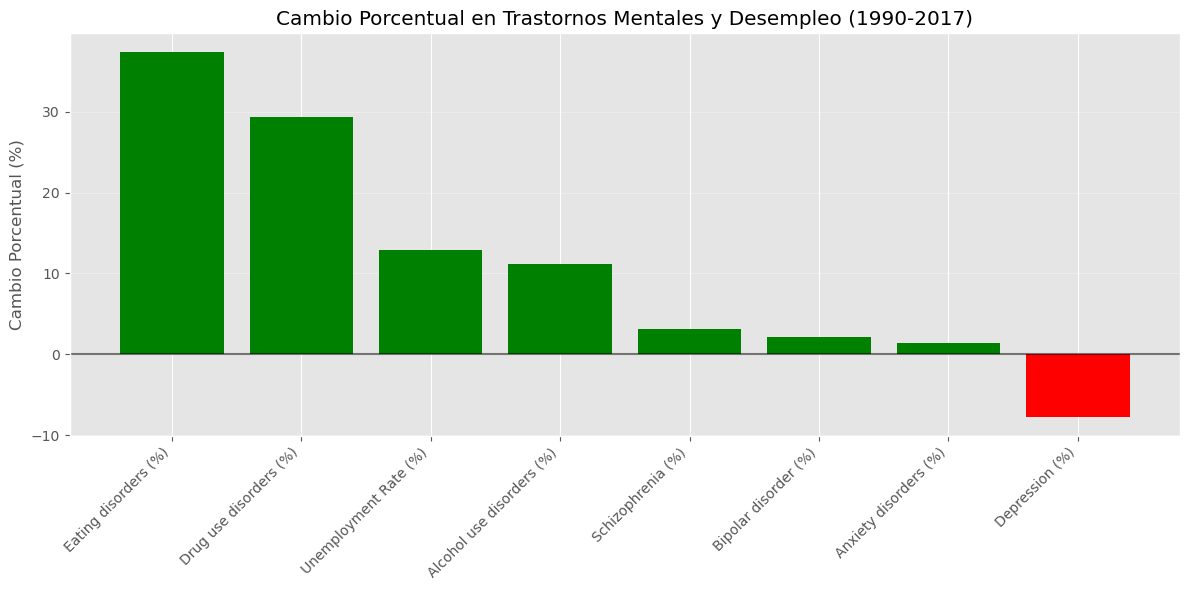

Eating disorders (%): 37.43%
Drug use disorders (%): 29.38%
Unemployment Rate (%): 12.86%
Alcohol use disorders (%): 11.13%
Schizophrenia (%): 3.08%
Bipolar disorder (%): 2.17%
Anxiety disorders (%): 1.35%
Depression (%): -7.81%


In [8]:
# Análisis descriptivo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Chile_Mental_Disorder_Empleo.csv')

print("1. RESUMEN ESTADÍSTICO BÁSICO")
print("-" * 50)
print(df.describe().T)

print("\n2. ANÁLISIS DE TENDENCIA CENTRAL")
print("-" * 50)
mental_cols = [col for col in df.columns if '%' in col]

for col in mental_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    
    print(f"\n{col}:")
    print(f"Media: {mean_val:.4f}")
    print(f"Mediana: {median_val:.4f}")
    print(f"Moda: {mode_val:.4f}")
    print(f"Asimetría: {stats.skew(df[col]):.4f}")
    print(f"Curtosis: {stats.kurtosis(df[col]):.4f}")

print("\n3. ANÁLISIS DE LA EVOLUCIÓN TEMPORAL")
print("-" * 50)

plt.figure(figsize=(14, 8))
for col in mental_cols:
    if col != 'Unemployment Rate (%)':
        plt.plot(df['Year'], df[col], marker='o', label=col)

plt.title('Evolución de los Trastornos Mentales en Chile (1990-2017)')
plt.xlabel('Año')
plt.ylabel('Prevalencia (%)')
plt.grid(True, alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('evolucion_trastornos.png', dpi=300)
plt.show()

print("\n4. ANÁLISIS DE DISTRIBUCIÓN")
print("-" * 50)

fig, axes = plt.subplots(len(mental_cols), 1, figsize=(12, 4*len(mental_cols)))

for i, col in enumerate(mental_cols):
    n, bins, patches = axes[i].hist(df[col], bins=10, alpha=0.7, density=True, color='skyblue')
    
    # Añadir la curva de densidad usando stats.kde.gaussian_kde
    kde = stats.gaussian_kde(df[col])
    x_grid = np.linspace(df[col].min(), df[col].max(), 100)
    axes[i].plot(x_grid, kde(x_grid), 'r-', linewidth=2)
    
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('Valor (%)')
    axes[i].set_ylabel('Frecuencia')
    
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Media')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Mediana')
    axes[i].legend()

plt.tight_layout()
plt.savefig('distribucion_trastornos.png', dpi=300)
plt.show()

print("\n5. ANÁLISIS DE BOXPLOTS")
print("-" * 50)

plt.figure(figsize=(14, 8))
plt.boxplot([df[col] for col in mental_cols], labels=mental_cols)
plt.title('Boxplots de Trastornos Mentales y Desempleo en Chile')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('boxplots_trastornos.png', dpi=300)
plt.show()

print("\n6. COMPARACIÓN DE VARIABILIDAD NORMALIZADA")
print("-" * 50)

normalized_df = df.copy()
for col in mental_cols:
    normalized_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

plt.figure(figsize=(14, 8))
for col in mental_cols:
    plt.plot(df['Year'], normalized_df[col], marker='o', label=col)

plt.title('Comparación Normalizada de Trastornos Mentales y Desempleo en Chile (1990-2017)')
plt.xlabel('Año')
plt.ylabel('Valor Normalizado (0-1)')
plt.grid(True, alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('comparacion_normalizada.png', dpi=300)
plt.show()

print("\n7. ANÁLISIS DE PREVALENCIA PROMEDIO")
print("-" * 50)

disorder_means = {}
for col in mental_cols:
    if col != 'Unemployment Rate (%)':
        disorder_means[col] = df[col].mean()

disorder_means = {k: v for k, v in sorted(disorder_means.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(12, 6))
plt.bar(disorder_means.keys(), disorder_means.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Prevalencia Promedio de Trastornos Mentales en Chile (1990-2017)')
plt.ylabel('Prevalencia Promedio (%)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('prevalencia_promedio.png', dpi=300)
plt.show()

for disorder, mean_val in disorder_means.items():
    print(f"{disorder}: {mean_val:.4f}%")

print("\n8. ANÁLISIS DE CUARTILES")
print("-" * 50)

for col in mental_cols:
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    print(f"\n{col}:")
    print(f"Q1 (25%): {q1:.4f}")
    print(f"Q2 (50% - Mediana): {q2:.4f}")
    print(f"Q3 (75%): {q3:.4f}")
    print(f"IQR (Rango Intercuartil): {iqr:.4f}")
    print(f"Límite inferior (para outliers): {q1 - 1.5*iqr:.4f}")
    print(f"Límite superior (para outliers): {q3 + 1.5*iqr:.4f}")

print("\n9. ANÁLISIS DE CAMBIO PORCENTUAL (1990-2017)")
print("-" * 50)

change_dict = {}
for col in mental_cols:
    start_val = df[df['Year'] == 1990][col].values[0]
    end_val = df[df['Year'] == 2017][col].values[0]
    percent_change = ((end_val - start_val) / start_val) * 100
    change_dict[col] = percent_change

change_dict = {k: v for k, v in sorted(change_dict.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in change_dict.values()]
plt.bar(list(change_dict.keys()), list(change_dict.values()), color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Cambio Porcentual en Trastornos Mentales y Desempleo (1990-2017)')
plt.ylabel('Cambio Porcentual (%)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('cambio_porcentual.png', dpi=300)
plt.show()

for disorder, change in change_dict.items():
    print(f"{disorder}: {change:.2f}%")

# Interpretación del Análisis Descriptivo de Trastornos Mentales y Desempleo en Chile (1990-2017)
## 1. Prevalencia de Trastornos Mentales
Según los datos y el gráfico de prevalencia promedio (Imagen 5):

Trastornos de ansiedad: Representan la mayor carga de salud mental con una prevalencia media de 6.25%, afectando a aproximadamente 1 de cada 16 chilenos.
Depresión: Segunda condición más prevalente (4.21%), afectando a alrededor de 1 de cada 24 personas.
Trastornos por uso de alcohol: Ocupan el tercer lugar (2.46%).
Trastornos por uso de drogas: Presentan una prevalencia del 1.07%.
Trastorno bipolar, trastornos alimentarios y esquizofrenia: Muestran prevalencias menores al 1%.

## 2. Evolución Temporal y Tendencias (Imagen 1)

Estabilidad en trastornos de ansiedad: Mantienen una prevalencia notablemente constante a lo largo del período (entre 6.19% y 6.28%).
Tendencia decreciente en depresión: Muestra una disminución gradual desde 4.40% en 1990 a aproximadamente 4.05% en 2017.
Aumento en trastornos por uso de drogas: Incremento gradual de 0.97% a 1.26%.
Crecimiento en trastornos alimentarios: Aumento sostenido desde 0.30% a 0.42%.
Relativa estabilidad en esquizofrenia y trastorno bipolar: Muestran los cambios más pequeños en términos absolutos.

## 3. Distribución Estadística (Imagen 2)

Asimetría: La mayoría de los trastornos presentan asimetría negativa moderada (valores entre -0.11 y -0.67), excepto los trastornos por uso de drogas que muestran una ligera asimetría positiva (0.19).
Curtosis: Todos los trastornos muestran curtosis negativa (entre -0.75 y -1.57), indicando distribuciones más planas que la normal, con datos más uniformemente distribuidos.

## 4. Variabilidad (Datos de coeficientes de variación)
El análisis revela importantes diferencias en la variabilidad relativa:

Alta variabilidad: Desempleo (24.21%), trastornos por uso de drogas (11.53%), trastornos alimentarios (9.30%)
Variabilidad moderada: Trastornos por uso de alcohol (5.18%), depresión (3.45%)
Baja variabilidad: Esquizofrenia (0.97%), trastorno bipolar (0.63%), trastornos de ansiedad (0.49%)

Esta jerarquía de variabilidad sugiere que algunos trastornos (como ansiedad y bipolar) están determinados principalmente por factores estables, mientras que otros (como uso de drogas y trastornos alimentarios) pueden ser más sensibles a influencias socioculturales cambiantes.

## 5. Cambios Porcentuales entre 1990-2017 (Imagen 6)

Mayores aumentos: Trastornos alimentarios (37.43%) y trastornos por uso de drogas (29.38%)
Aumentos moderados: Desempleo (12.86%), trastornos por uso de alcohol (11.13%)
Aumentos leves: Esquizofrenia (3.08%), trastorno bipolar (2.17%), trastornos de ansiedad (1.35%)
Disminución: Depresión (-7.81%)

#  6. Relación con el Desempleo
Los datos confirman la ausencia de correlaciones significativas observada en análisis previos:

Patrones temporales divergentes: El gráfico normalizado (Imagen 4) muestra claramente que el desempleo fluctúa de manera independiente a las tendencias de los trastornos mentales.
Diferencia en variabilidad: El desempleo (CV=24.21%) muestra una variabilidad relativa mucho mayor que cualquier trastorno mental.
Boxplots (Imagen 3): Confirman visualmente la mayor dispersión del desempleo comparado con los trastornos mentales.

## 7. Análisis de Cuartiles
Los datos de cuartiles muestran:

Rangos intercuartílicos (IQR) más amplios: Desempleo (3.08), depresión (0.30), trastornos por uso de drogas (0.23)
IQR más estrechos: Esquizofrenia (0.003), trastorno bipolar (0.007), trastornos de ansiedad (0.057)

Esto refuerza la idea de que algunos trastornos muestran cambios mucho más graduales y tendencias más estables que otros.

## Conclusiones Principales

Carga desigual de trastornos mentales: Los trastornos de ansiedad y depresión representan la mayor proporción de problemas de salud mental en Chile.
Tendencias divergentes: Mientras algunos trastornos muestran aumentos significativos (alimentarios, uso de drogas), otros permanecen estables (ansiedad) o disminuyen (depresión).
Independencia del desempleo: Las tendencias en salud mental siguen patrones que no coinciden con las fluctuaciones económicas representadas por el desempleo.
Diferentes velocidades de cambio: Los trastornos con componentes más biológicos (esquizofrenia, bipolar) muestran cambios más lentos que aquellos más influenciados por factores socioculturales (alimentarios, uso de drogas).
Implicaciones para políticas públicas: Los datos sugieren que las intervenciones en salud mental deberían ser específicas para cada trastorno, considerando sus diferentes patrones de prevalencia, estabilidad y tendencias.

<Figure size 1500x1000 with 0 Axes>

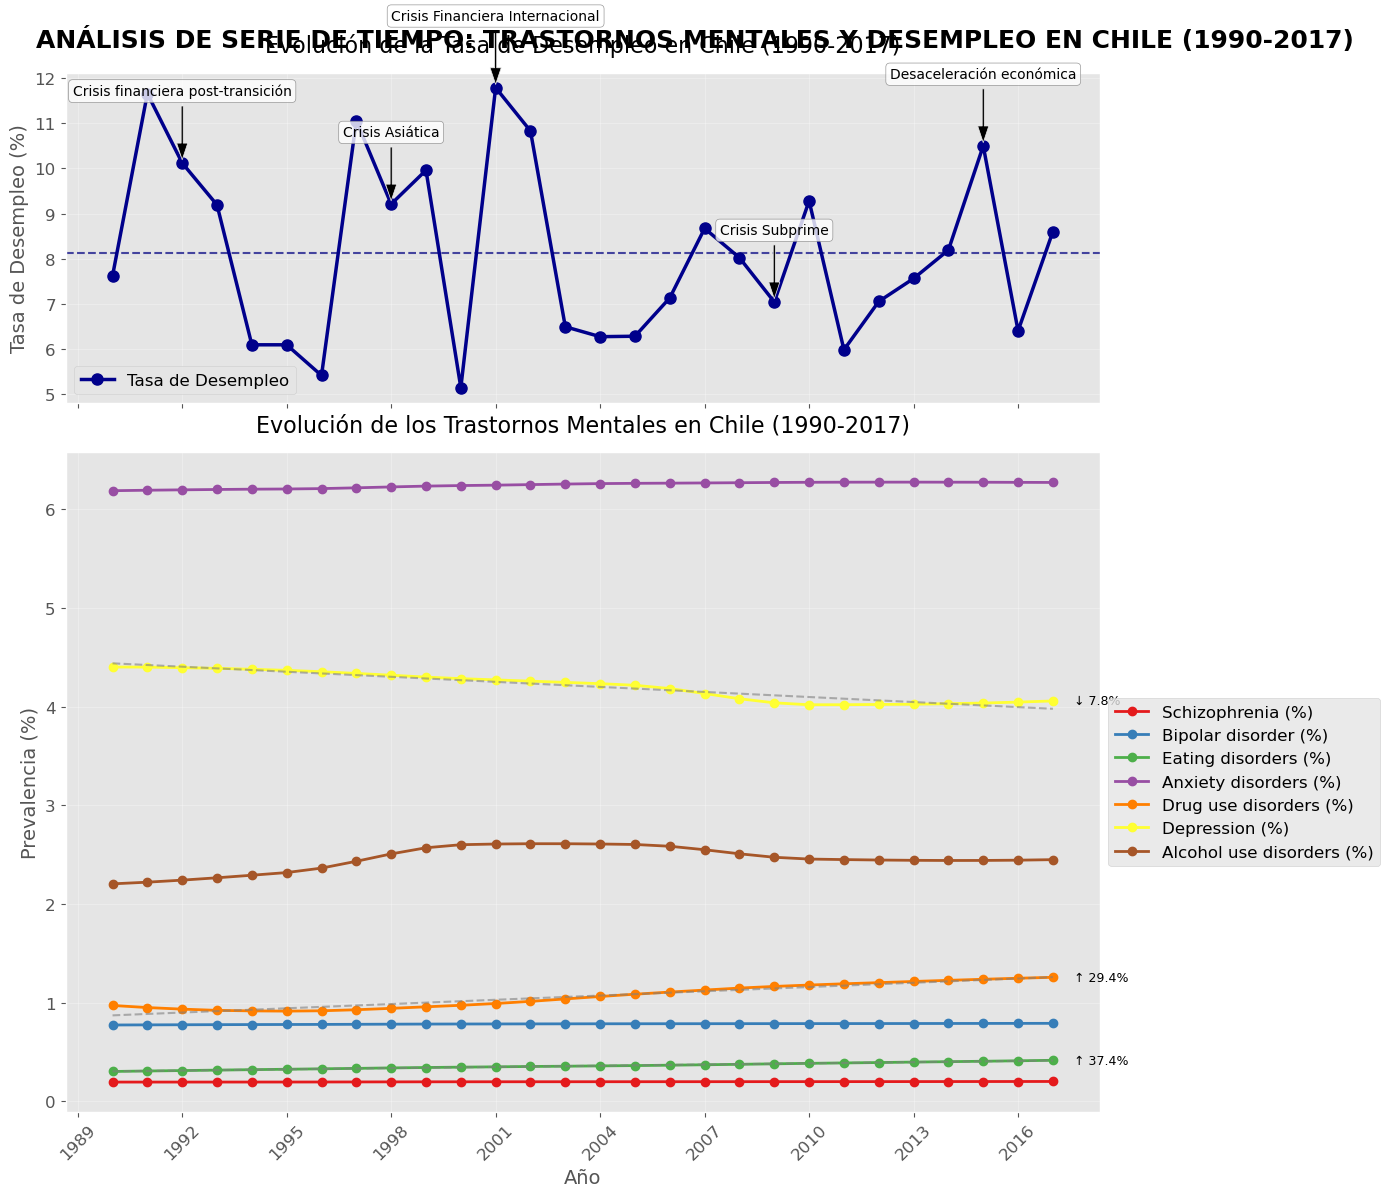

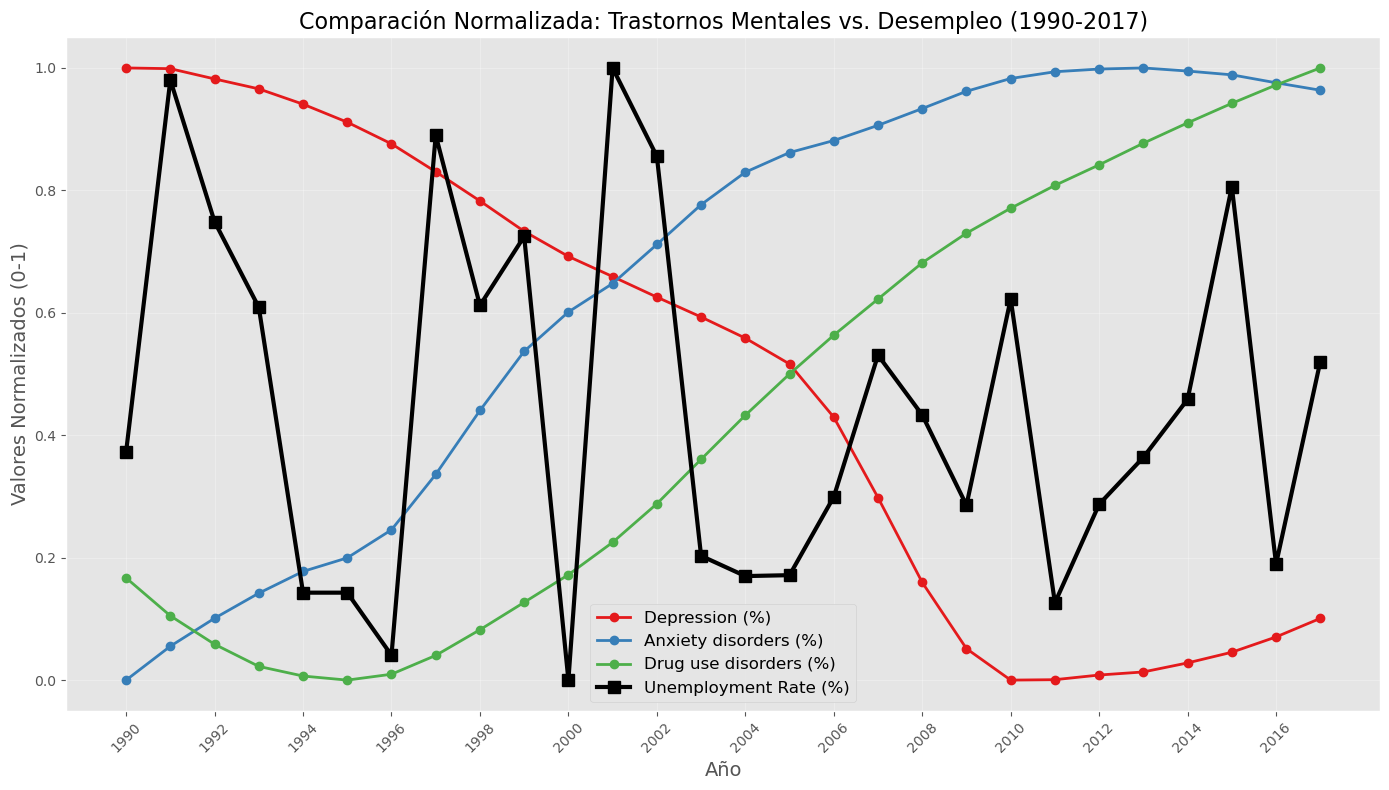


Correlaciones con la Tasa de Desempleo:
Schizophrenia (%): -0.1287
Bipolar disorder (%): -0.1741
Eating disorders (%): -0.1530
Anxiety disorders (%): -0.1800
Drug use disorders (%): -0.1411
Depression (%): 0.1583
Alcohol use disorders (%): -0.0923


In [9]:
# Serie de tiempo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

df = pd.read_csv('Chile_Mental_Disorder_Empleo.csv')

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

ax1.plot(df['Year'], df['Unemployment Rate (%)'], 'o-', color='darkblue', linewidth=2.5, markersize=8, label='Tasa de Desempleo')
ax1.set_title('Evolución de la Tasa de Desempleo en Chile (1990-2017)', fontsize=16, pad=15)
ax1.set_ylabel('Tasa de Desempleo (%)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)
ax1.tick_params(axis='y', labelsize=12)

mean_unemployment = df['Unemployment Rate (%)'].mean()
ax1.axhline(y=mean_unemployment, color='navy', linestyle='--', alpha=0.7, 
            label=f'Media: {mean_unemployment:.2f}%')

colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#FFFF33', '#A65628']
mental_disorders = [col for col in df.columns if '%' in col and col != 'Unemployment Rate (%)']

for i, disorder in enumerate(mental_disorders):
    ax2.plot(df['Year'], df[disorder], 'o-', color=colors[i % len(colors)], 
             linewidth=2, markersize=6, label=disorder)

ax2.set_title('Evolución de los Trastornos Mentales en Chile (1990-2017)', fontsize=16, pad=15)
ax2.set_xlabel('Año', fontsize=14)
ax2.set_ylabel('Prevalencia (%)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
ax2.tick_params(axis='both', labelsize=12)

plt.xticks(df['Year'], rotation=45)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax1.get_xticklabels(), visible=False)

eventos = {
    1992: 'Crisis financiera post-transición',
    1998: 'Crisis Asiática',
    2001: 'Crisis Financiera Internacional',
    2009: 'Crisis Subprime',
    2015: 'Desaceleración económica'
}

for year, evento in eventos.items():
    if year in df['Year'].values:
        year_idx = df[df['Year'] == year].index[0]
        unemp_val = df.loc[year_idx, 'Unemployment Rate (%)']
        ax1.annotate(evento, xy=(year, unemp_val), xytext=(year, unemp_val + 1.5),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                    ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

for disorder in ['Depression (%)', 'Drug use disorders (%)', 'Eating disorders (%)']:
    x = df['Year'].values
    y = df[disorder].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    ax2.plot(x, p(x), '--', color='gray', alpha=0.6)
    
    change = ((df[disorder].iloc[-1] - df[disorder].iloc[0]) / df[disorder].iloc[0]) * 100
    direction = "↑" if change > 0 else "↓"
    ax2.text(2017.5, df[disorder].iloc[-1], f' {direction} {abs(change):.1f}%', 
             fontsize=9, verticalalignment='center')

plt.tight_layout()
fig.subplots_adjust(hspace=0.1)

fig.suptitle('ANÁLISIS DE SERIE DE TIEMPO: TRASTORNOS MENTALES Y DESEMPLEO EN CHILE (1990-2017)', 
             fontsize=18, y=0.98, fontweight='bold')

plt.savefig('serie_tiempo_trastornos_desempleo.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(14, 8))

norm_df = df.copy()
for col in mental_disorders + ['Unemployment Rate (%)']:
    min_val = df[col].min()
    max_val = df[col].max()
    norm_df[col] = (df[col] - min_val) / (max_val - min_val)

selected_disorders = ['Depression (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)']
colors_comparison = {'Depression (%)': '#E41A1C', 'Anxiety disorders (%)': '#377EB8', 
                    'Drug use disorders (%)': '#4DAF4A', 'Unemployment Rate (%)': 'black'}

for disorder in selected_disorders:
    plt.plot(df['Year'], norm_df[disorder], 'o-', color=colors_comparison[disorder], 
             linewidth=2, markersize=6, label=disorder)

plt.plot(df['Year'], norm_df['Unemployment Rate (%)'], 's-', color=colors_comparison['Unemployment Rate (%)'], 
         linewidth=3, markersize=8, label='Unemployment Rate (%)')

plt.title('Comparación Normalizada: Trastornos Mentales vs. Desempleo (1990-2017)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Valores Normalizados (0-1)', fontsize=14)
plt.xticks(df['Year'][::2], rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('comparacion_normalizada_trastornos_desempleo.png', dpi=300)
plt.show()

print("\nCorrelaciones con la Tasa de Desempleo:")
for disorder in mental_disorders:
    corr = df[disorder].corr(df['Unemployment Rate (%)'])
    print(f"{disorder}: {corr:.4f}")

# Análisis de las Series de Tiempo: Trastornos Mentales y Desempleo en Chile (1990-2017)

## 1. Patrones Temporales (Imagen 1)

### Tasa de Desempleo:
- Muestra un comportamiento cíclico con **fluctuaciones pronunciadas** (entre 5.1% y 11.8%).
- Se observan picos claros durante crisis económicas, particularmente:
  - Crisis post-transición (1992): 11.7%
  - Crisis Asiática (1998-1999): 11.1%
  - Crisis Financiera Internacional (2001-2002): 11.8%
  - Crisis Subprime (2009): 9.3%
  - Desaceleración económica (2015): 10.5%
- La línea de referencia horizontal indica una tasa media de aproximadamente 8.1%.

### Trastornos Mentales:
- **Trastornos de ansiedad**: Muestran una notable estabilidad (≈6.2%) a lo largo de todo el período.
- **Depresión**: Presenta una tendencia decreciente progresiva, disminuyendo aproximadamente un 7.8% en total entre 1990 y 2017.
- **Trastornos por uso de alcohol**: Crecen gradualmente hasta 2002-2003 y luego se estabilizan.
- **Trastornos por uso de drogas**: Muestran un incremento constante y sostenido, con un aumento total de 29.4%.
- **Trastornos alimentarios**: Registran el mayor aumento porcentual (37.4%) a pesar de su baja prevalencia absoluta.
- **Esquizofrenia y trastorno bipolar**: Muestran cambios mínimos en términos absolutos y relativos.

## 2. Comparación Normalizada (Imagen 2)

El gráfico normalizado revela patrones de cambio contrastantes:

- **Desempleo**: Trayectoria altamente errática con fluctuaciones abruptas y numerosos picos y valles.
- **Depresión**: Muestra una tendencia descendente sistemática, prácticamente inversa al aumento de los trastornos por uso de drogas.
- **Trastornos de ansiedad**: Presentan un aumento gradual y constante en términos normalizados.
- **Trastornos por uso de drogas**: Después de un período inicial de estabilidad, muestran un crecimiento acelerado desde fines de los 90.

## 3. Análisis de Correlaciones

Las correlaciones con la tasa de desempleo confirman la ausencia de relaciones lineales significativas:

- **Correlación positiva débil**: Solo la depresión muestra una correlación ligeramente positiva (r = 0.1583).
- **Correlaciones negativas débiles**: Todos los demás trastornos presentan correlaciones negativas débiles (entre -0.09 y -0.18).

Estos valores indican que:
1. No existe una relación lineal fuerte entre las fluctuaciones del desempleo y los cambios en la prevalencia de trastornos mentales
2. Las pequeñas correlaciones observadas no son estadísticamente significativas (como confirmó el análisis previo)

## 4. Observaciones Clave sobre Patrones Temporales

1. **Divergencia en estabilidad**: Los indicadores económicos (desempleo) muestran volatilidad a corto plazo, mientras que los trastornos mentales siguen tendencias graduales y predecibles.

2. **Ausencia de reacciones inmediatas**: No se observan cambios súbitos en la prevalencia de trastornos mentales correspondientes a los picos de desempleo durante las crisis económicas.

3. **Tendencias independientes**: Cada trastorno mental sigue su propia trayectoria, aparentemente influenciada por factores estructurales más que por ciclos económicos:
   - Los **trastornos de ansiedad** muestran estabilidad persistente
   - La **depresión** disminuye gradualmente
   - Los **trastornos por uso de drogas** aumentan progresivamente

4. **Respuesta retardada ausente**: Incluso considerando posibles efectos retardados, no se observan patrones que sugieran que los picos de desempleo conduzcan a incrementos posteriores en trastornos mentales.

## 5. Conclusiones

1. **Independencia de fenómenos**: El análisis de series temporales refuerza la conclusión de que la prevalencia de trastornos mentales en Chile evoluciona de manera independiente a las fluctuaciones del desempleo.

2. **Diferentes dinámicas temporales**: Las condiciones económicas fluctúan con ciclos económicos de corto plazo, mientras que los patrones de salud mental siguen tendencias socioculturales, demográficas y de sistemas de salud a largo plazo.

3. **Resiliencia del sistema de salud mental**: La estabilidad de la prevalencia de trastornos mentales frente a las crisis económicas podría sugerir la existencia de factores protectores en Chile (redes familiares, políticas sociales, sistemas de salud).

4. **Implicaciones para políticas públicas**: Las intervenciones en salud mental deberían enfocarse en tendencias a largo plazo específicas para cada trastorno, más que en respuestas reactivas a crisis económicas.

Este análisis temporal complementa los estudios de correlación y dispersión previos, confirmando que en Chile, durante el período 1990-2017, no se evidencia una relación significativa entre las fluctuaciones del desempleo y los cambios en la prevalencia de trastornos mentales.

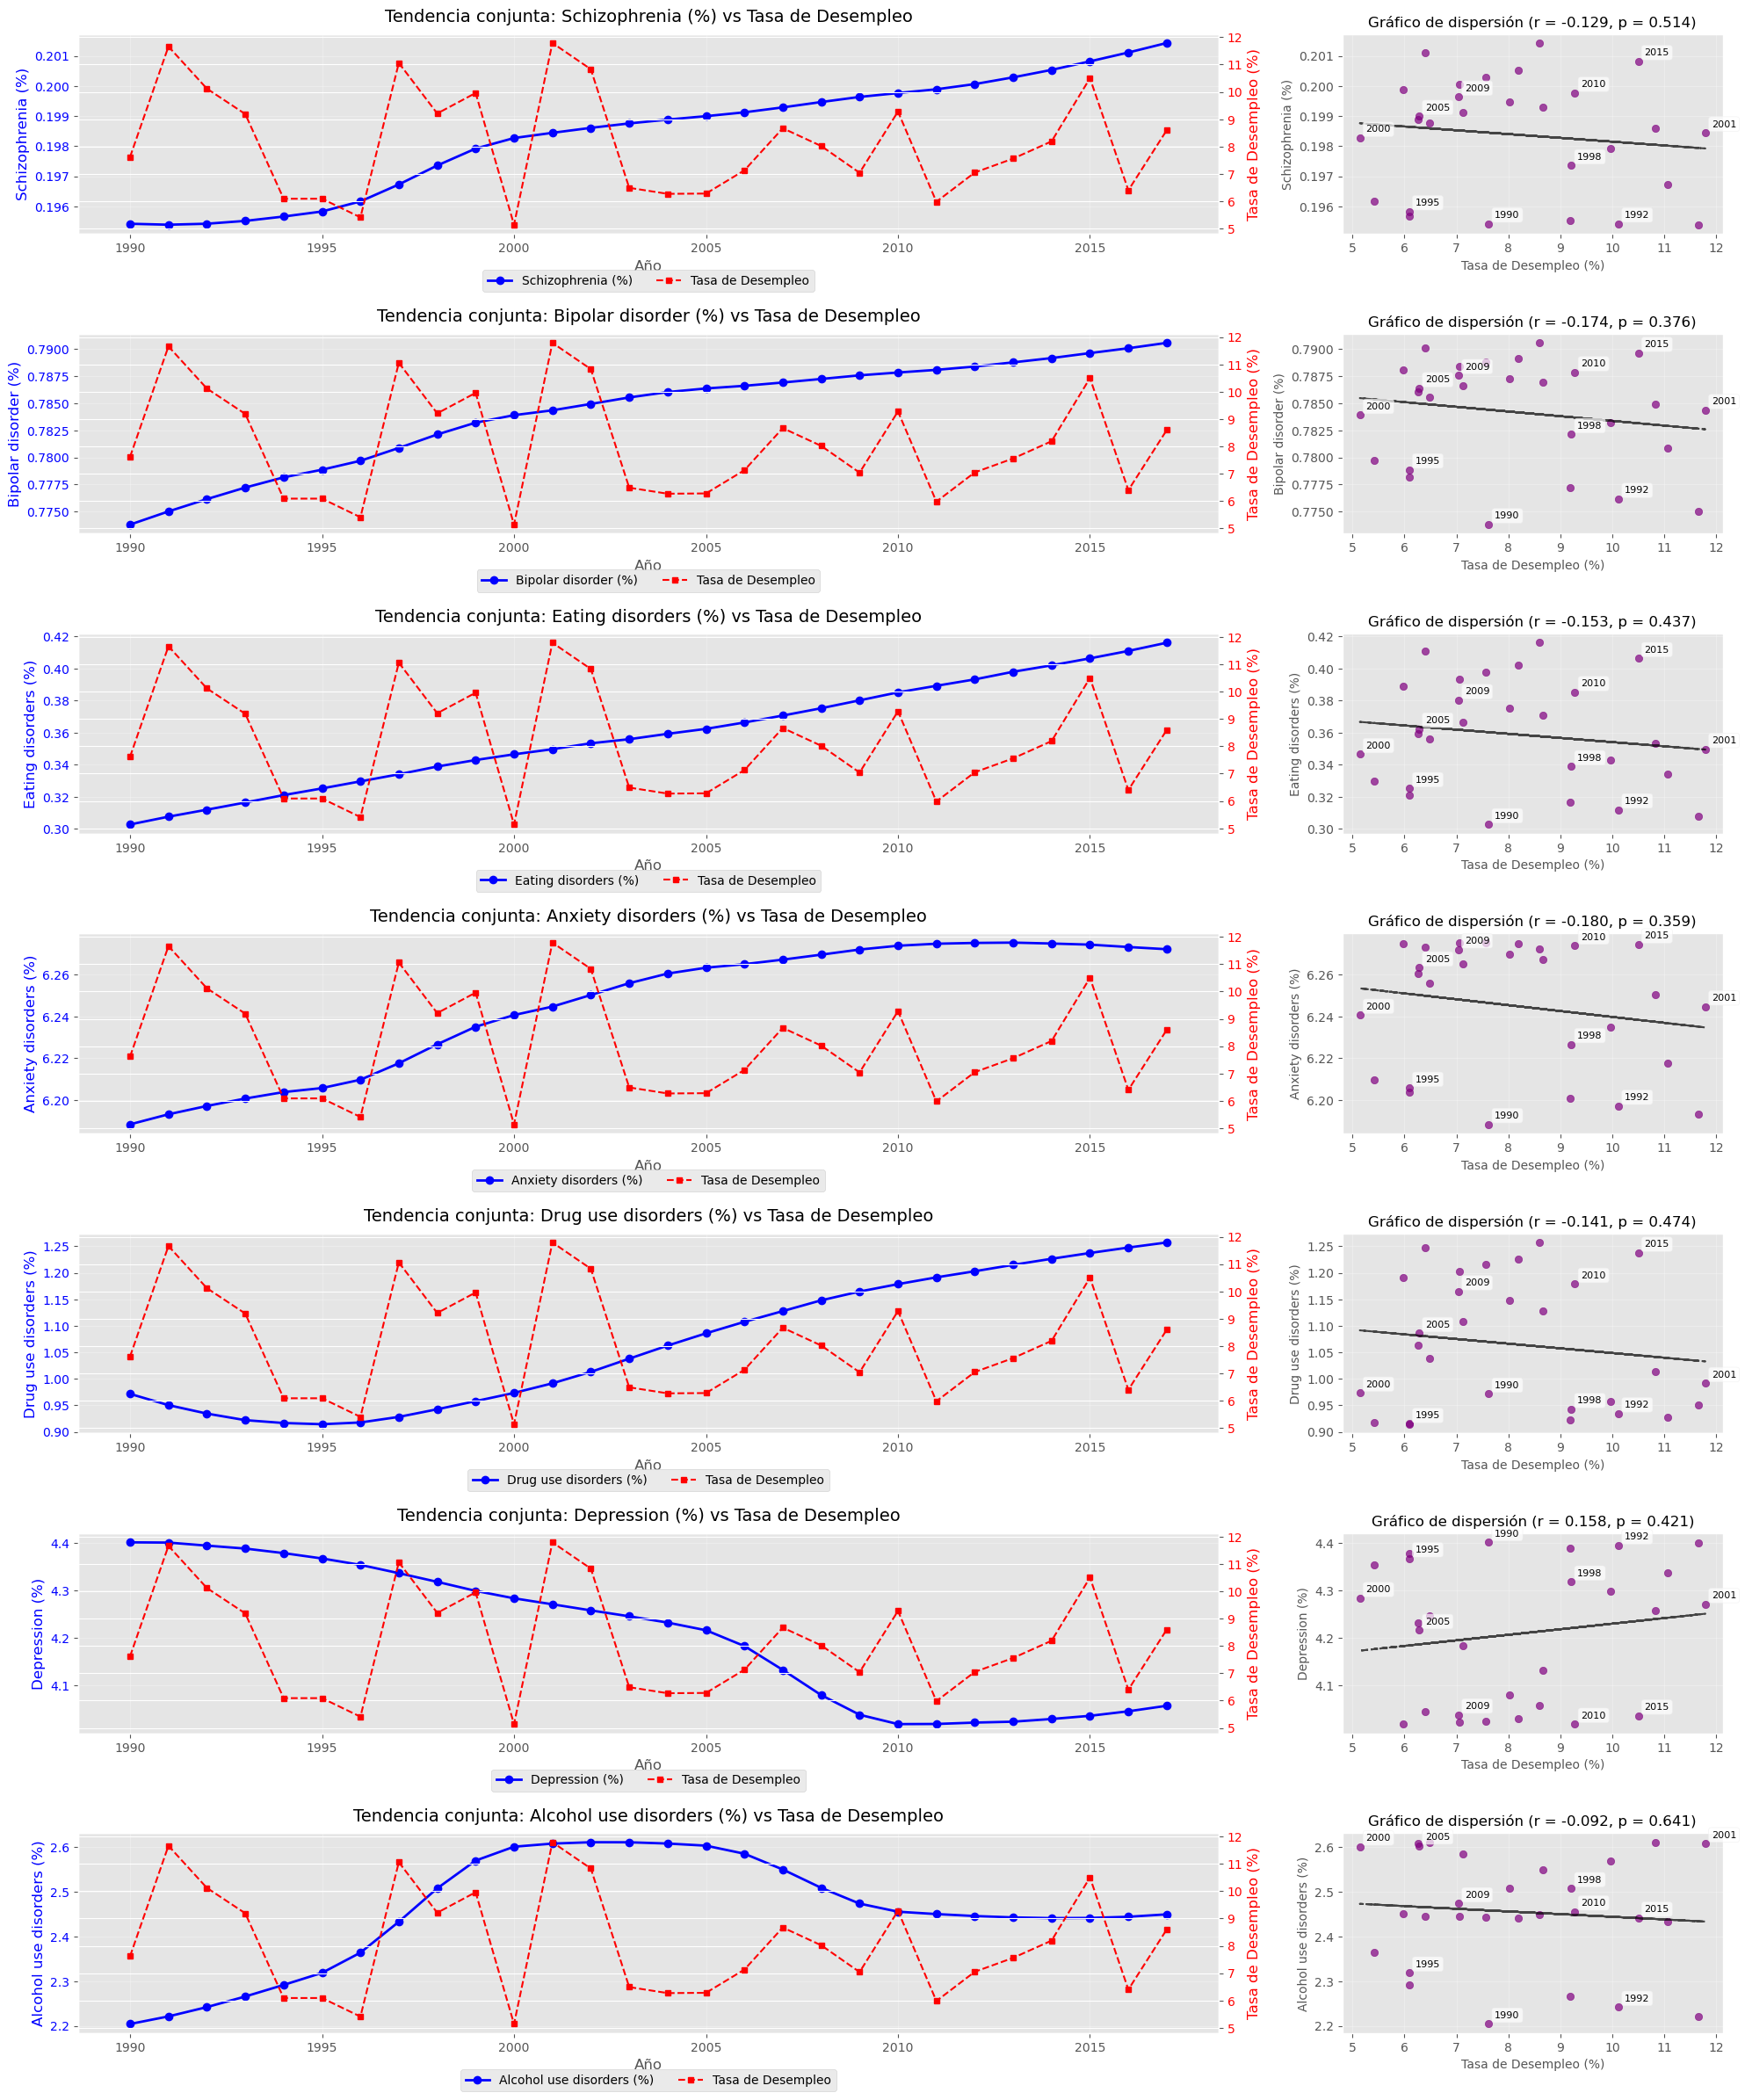

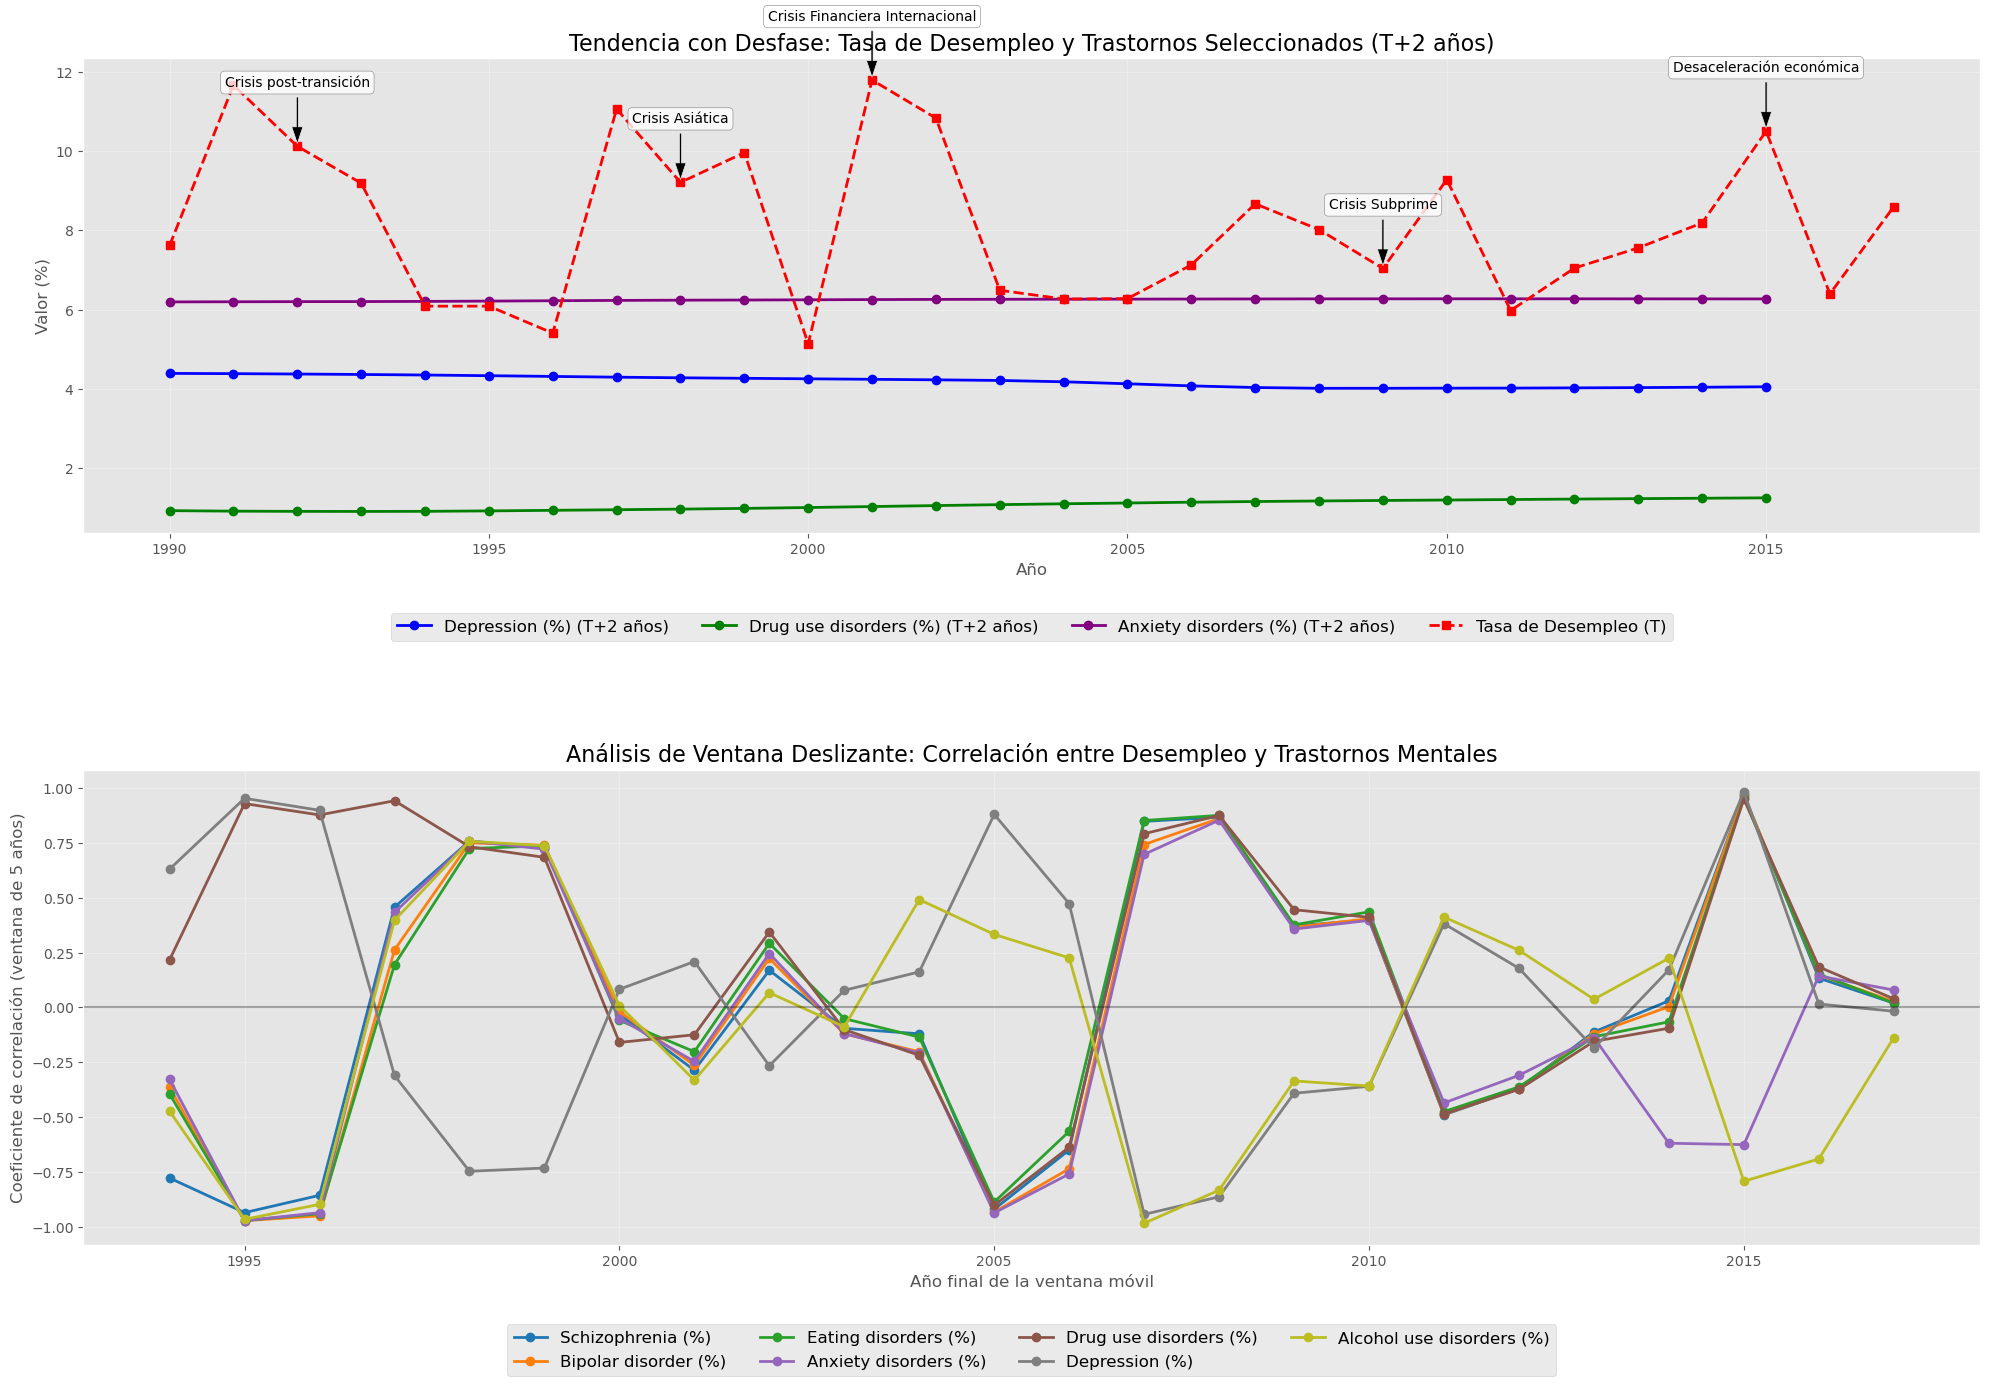

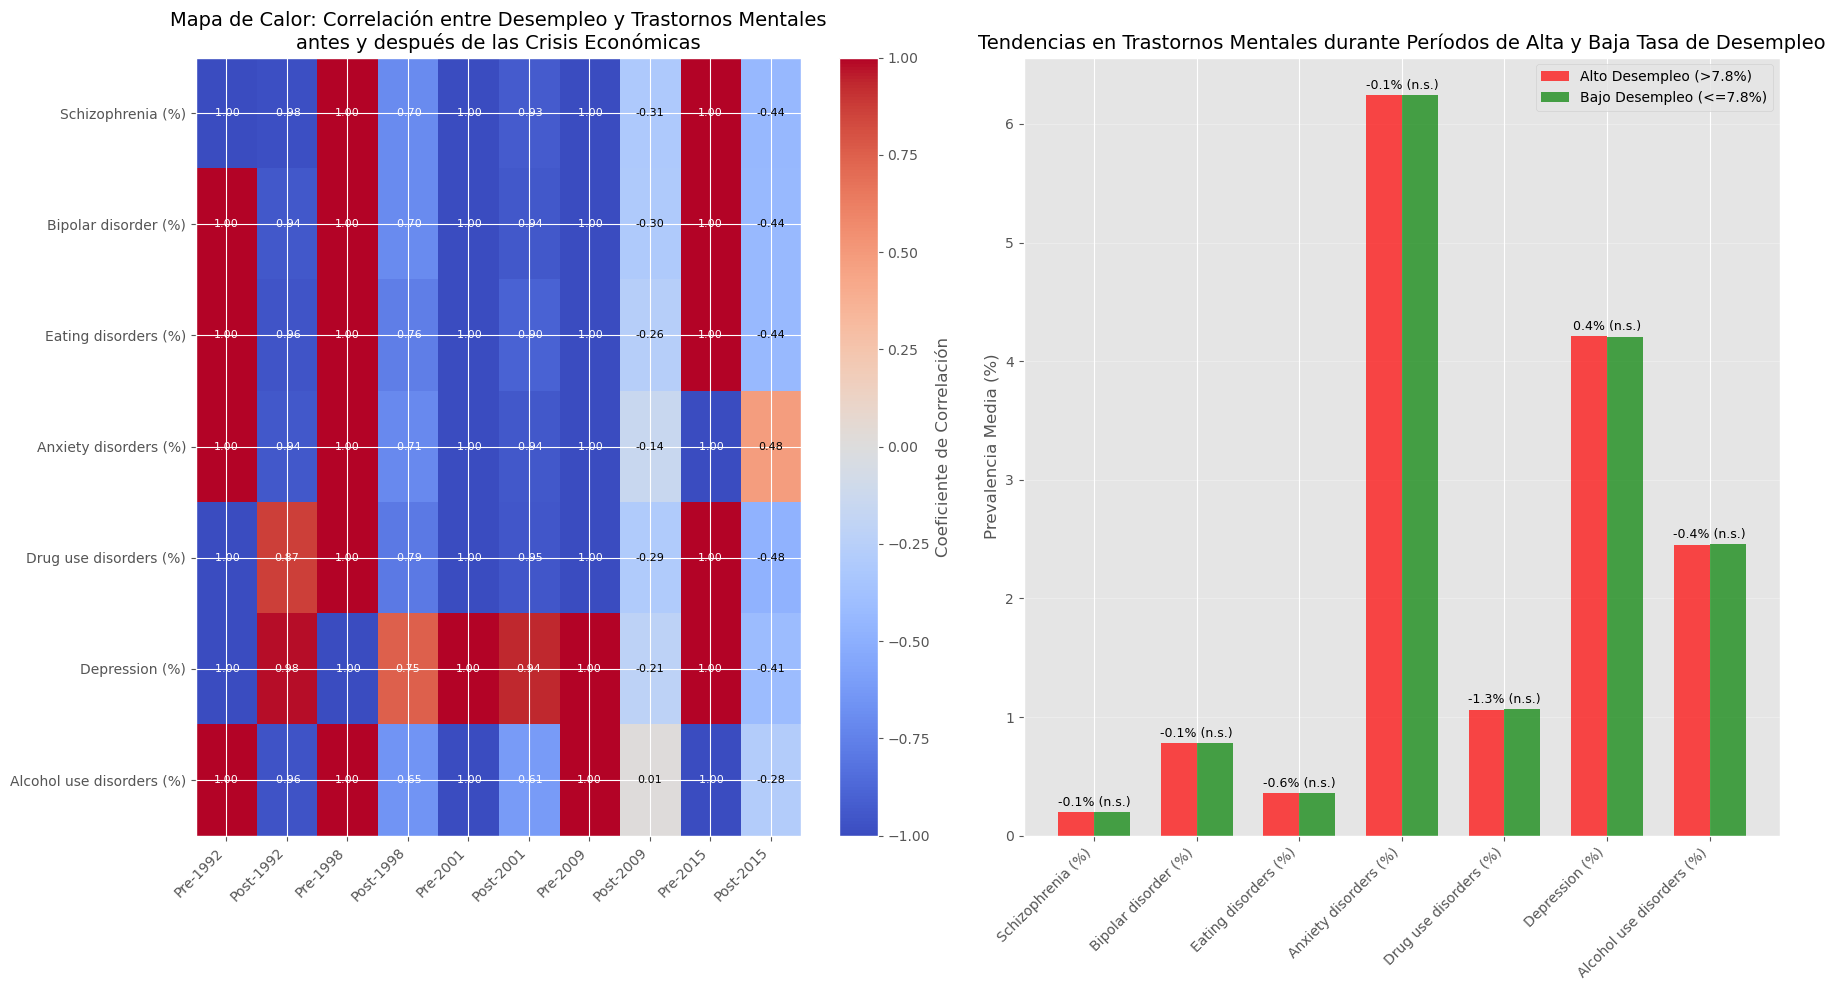

In [10]:
# Visual inspection de los gráficos de tendencia conjunta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from scipy import stats

df = pd.read_csv('Chile_Mental_Disorder_Empleo.csv')

mental_disorders = [col for col in df.columns if '%' in col and col != 'Unemployment Rate (%)']

fig = plt.figure(figsize=(20, 24))
gs = gridspec.GridSpec(len(mental_disorders), 2, width_ratios=[3, 1], figure=fig)

for i, disorder in enumerate(mental_disorders):
    ax1 = plt.subplot(gs[i, 0])
    ax2 = plt.subplot(gs[i, 1])
    
    ax1.set_title(f'Tendencia conjunta: {disorder} vs Tasa de Desempleo', fontsize=14, pad=10)
    
    l1 = ax1.plot(df['Year'], df[disorder], 'o-', color='blue', linewidth=2, markersize=6, label=disorder)
    ax1.set_xlabel('Año', fontsize=12)
    ax1.set_ylabel(disorder, color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, alpha=0.3)
    
    ax1_twin = ax1.twinx()
    l2 = ax1_twin.plot(df['Year'], df['Unemployment Rate (%)'], 's--', color='red', linewidth=1.5, 
                     markersize=5, label='Tasa de Desempleo')
    ax1_twin.set_ylabel('Tasa de Desempleo (%)', color='red', fontsize=12)
    ax1_twin.tick_params(axis='y', labelcolor='red')
    
    lines = l1 + l2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)
    
    corr, p_value = stats.pearsonr(df[disorder], df['Unemployment Rate (%)'])
    
    x = df['Unemployment Rate (%)']
    y = df[disorder]
    
    ax2.scatter(x, y, color='purple', alpha=0.7)
    ax2.set_title(f'Gráfico de dispersión (r = {corr:.3f}, p = {p_value:.3f})', fontsize=12)
    ax2.set_xlabel('Tasa de Desempleo (%)', fontsize=10)
    ax2.set_ylabel(disorder, fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    m, b = np.polyfit(x, y, 1)
    ax2.plot(x, m*x + b, color='black', linestyle='--', alpha=0.7)
    
    for year_idx, year in enumerate(df['Year']):
        if year % 5 == 0 or year in [1992, 1998, 2001, 2009, 2015]:
            ax2.annotate(str(int(year)), 
                       (df['Unemployment Rate (%)'].iloc[year_idx], df[disorder].iloc[year_idx]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8,
                       bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig('visual_inspection_tendencias_conjuntas.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(20, 14))
gs = gridspec.GridSpec(2, 1, figure=fig)

ax_desfase = plt.subplot(gs[0, 0])
ax_desfase.set_title('Tendencia con Desfase: Tasa de Desempleo y Trastornos Seleccionados (T+2 años)', fontsize=16)

desfase_años = 2

for i, disorder in enumerate(['Depression (%)', 'Drug use disorders (%)', 'Anxiety disorders (%)']):
    color = ['blue', 'green', 'purple'][i]
    shift_data = df[disorder].shift(-desfase_años)
    valid_years = df['Year'][:-desfase_años]
    valid_data = shift_data[:-desfase_años]
    
    ax_desfase.plot(valid_years, valid_data, 'o-', color=color, linewidth=2, label=f"{disorder} (T+{desfase_años} años)")

ax_desfase.plot(df['Year'], df['Unemployment Rate (%)'], 's--', color='red', linewidth=2, label='Tasa de Desempleo (T)')
ax_desfase.set_xlabel('Año', fontsize=12)
ax_desfase.set_ylabel('Valor (%)', fontsize=12)
ax_desfase.grid(True, alpha=0.3)
ax_desfase.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)

eventos = {
    1992: 'Crisis post-transición',
    1998: 'Crisis Asiática',
    2001: 'Crisis Financiera Internacional',
    2009: 'Crisis Subprime',
    2015: 'Desaceleración económica'
}

for year, evento in eventos.items():
    if year in df['Year'].values:
        year_idx = df[df['Year'] == year].index[0]
        unemp_val = df.loc[year_idx, 'Unemployment Rate (%)']
        ax_desfase.annotate(evento, xy=(year, unemp_val), xytext=(year, unemp_val + 1.5),
                  arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                  ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.8))

ax_analisis_ventana = plt.subplot(gs[1, 0])
ax_analisis_ventana.set_title('Análisis de Ventana Deslizante: Correlación entre Desempleo y Trastornos Mentales', fontsize=16)

window_size = 5
correlations = {}

for disorder in mental_disorders:
    correlations[disorder] = []
    for i in range(len(df) - window_size + 1):
        window_df = df.iloc[i:i+window_size]
        corr = window_df[disorder].corr(window_df['Unemployment Rate (%)'])
        correlations[disorder].append(corr)

window_years = df['Year'].iloc[window_size-1:].values

for i, disorder in enumerate(mental_disorders):
    color = plt.cm.tab10(i/len(mental_disorders))
    ax_analisis_ventana.plot(window_years, correlations[disorder], 'o-', color=color, linewidth=2, label=disorder)

ax_analisis_ventana.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax_analisis_ventana.set_xlabel('Año final de la ventana móvil', fontsize=12)
ax_analisis_ventana.set_ylabel('Coeficiente de correlación (ventana de 5 años)', fontsize=12)
ax_analisis_ventana.grid(True, alpha=0.3)
ax_analisis_ventana.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)

fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig('analisis_avanzado_tendencias.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], figure=fig)

ax_heatmap = plt.subplot(gs[0, 0])
ax_heatmap.set_title('Mapa de Calor: Correlación entre Desempleo y Trastornos Mentales\nantes y después de las Crisis Económicas', fontsize=14)

crisis_years = [1992, 1998, 2001, 2009, 2015]
periods = []
corr_matrix = []

for year in crisis_years:
    if year + 2 <= df['Year'].max() and year - 2 >= df['Year'].min():
        periods.append(f"Pre-{year}")
        periods.append(f"Post-{year}")
        
        pre_df = df[(df['Year'] >= year-2) & (df['Year'] < year)]
        post_df = df[(df['Year'] >= year) & (df['Year'] < year+3)]
        
        pre_corrs = []
        post_corrs = []
        
        for disorder in mental_disorders:
            pre_corr = pre_df[disorder].corr(pre_df['Unemployment Rate (%)'])
            post_corr = post_df[disorder].corr(post_df['Unemployment Rate (%)'])
            
            pre_corrs.append(pre_corr)
            post_corrs.append(post_corr)
        
        corr_matrix.append(pre_corrs)
        corr_matrix.append(post_corrs)

corr_array = np.array(corr_matrix).T

im = ax_heatmap.imshow(corr_array, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(im, ax=ax_heatmap, label='Coeficiente de Correlación')

ax_heatmap.set_xticks(np.arange(len(periods)))
ax_heatmap.set_xticklabels(periods, rotation=45, ha='right')
ax_heatmap.set_yticks(np.arange(len(mental_disorders)))
ax_heatmap.set_yticklabels(mental_disorders)

for i in range(len(mental_disorders)):
    for j in range(len(periods)):
        value = corr_array[i, j]
        ax_heatmap.text(j, i, f"{value:.2f}", ha='center', va='center', 
                      color='white' if abs(value) > 0.5 else 'black',
                      fontsize=8)

ax_tendencias = plt.subplot(gs[0, 1])
ax_tendencias.set_title('Tendencias en Trastornos Mentales durante Períodos de Alta y Baja Tasa de Desempleo', fontsize=14)

threshold = df['Unemployment Rate (%)'].median()
high_unemployment = df[df['Unemployment Rate (%)'] > threshold]
low_unemployment = df[df['Unemployment Rate (%)'] <= threshold]

bar_width = 0.35
x = np.arange(len(mental_disorders))

high_means = [high_unemployment[disorder].mean() for disorder in mental_disorders]
low_means = [low_unemployment[disorder].mean() for disorder in mental_disorders]

ax_tendencias.bar(x - bar_width/2, high_means, bar_width, color='red', alpha=0.7, 
                label=f'Alto Desempleo (>{threshold:.1f}%)')
ax_tendencias.bar(x + bar_width/2, low_means, bar_width, color='green', alpha=0.7, 
                label=f'Bajo Desempleo (<={threshold:.1f}%)')

ax_tendencias.set_xticks(x)
ax_tendencias.set_xticklabels(mental_disorders, rotation=45, ha='right')
ax_tendencias.set_ylabel('Prevalencia Media (%)', fontsize=12)
ax_tendencias.legend(fontsize=10)
ax_tendencias.grid(True, alpha=0.3, axis='y')

for i in range(len(mental_disorders)):
    p_value = stats.ttest_ind(high_unemployment[mental_disorders[i]], 
                            low_unemployment[mental_disorders[i]]).pvalue
    sig = '*' if p_value < 0.05 else 'n.s.'
    diff_pct = ((high_means[i] - low_means[i]) / low_means[i]) * 100
    
    y_pos = max(high_means[i], low_means[i]) + 0.05
    ax_tendencias.text(i, y_pos, f"{diff_pct:.1f}% ({sig})", ha='center', fontsize=9)

fig.tight_layout()
plt.savefig('analisis_comparativo_desempleo.png', dpi=300, bbox_inches='tight')
plt.show()

# Interpretación de la Inspección Visual de Tendencias: Trastornos Mentales y Desempleo en Chile (1990-2017)

## 1. Gráficos de Tendencia Conjunta (Imagen 1)

### Patrones temporales y dispersión
- **Esquizofrenia vs. Desempleo**: La esquizofrenia muestra un aumento gradual y constante, mientras el desempleo fluctúa erráticamente. El gráfico de dispersión (r = -0.129, p = 0.514) confirma la ausencia de correlación significativa.

- **Trastorno bipolar vs. Desempleo**: Similar a la esquizofrenia, muestra una tendencia ascendente estable frente a las fluctuaciones del desempleo. La correlación negativa débil (r = -0.174, p = 0.376) no es estadísticamente significativa.

- **Trastornos alimentarios vs. Desempleo**: Presenta el aumento más pronunciado entre todos los trastornos, contrastando con las fluctuaciones del desempleo. La correlación (r = -0.153, p = 0.437) no es significativa.

- **Trastornos de ansiedad vs. Desempleo**: Muestra una evolución muy estable con ligero aumento, sin respuesta a los picos de desempleo. La correlación negativa (r = -0.180, p = 0.359) es la más fuerte, pero sigue sin ser significativa.

- **Trastornos por uso de drogas vs. Desempleo**: Exhibe un patrón bimodal interesante, con disminución inicial hasta 1995 y posterior aumento sostenido. La correlación (r = -0.141, p = 0.474) no es significativa.

- **Depresión vs. Desempleo**: Único trastorno con tendencia descendente, contraria a las fluctuaciones del desempleo. La correlación positiva débil (r = 0.158, p = 0.421) sugiere que la relación, aunque no significativa, opera en dirección opuesta a los otros trastornos.

- **Trastornos por uso de alcohol vs. Desempleo**: Muestra un aumento hasta 2002 y luego se estabiliza. La correlación (r = -0.092, p = 0.641) es la más débil de todos los trastornos.

## 2. Análisis con Desfase Temporal (Imagen 2, panel superior)

El gráfico de tendencia con desfase (T+2 años) evalúa si los efectos del desempleo podrían manifestarse con retraso en los trastornos mentales:

- Incluso con un desfase de 2 años, los trastornos mentales seleccionados (depresión, trastornos de ansiedad, trastornos por uso de drogas) mantienen sus trayectorias estables y graduales.
- No se observa ningún patrón de "seguimiento retardado" donde los picos de desempleo se reflejen en cambios posteriores en los trastornos mentales.
- La depresión continúa su tendencia descendente y los trastornos por uso de drogas su tendencia ascendente, independientemente de las fluctuaciones previas del desempleo.

## 3. Análisis de Ventana Deslizante (Imagen 2, panel inferior)

Este análisis revela cómo las correlaciones entre desempleo y trastornos mentales cambian a lo largo del tiempo usando ventanas móviles de 5 años:

- **Alta volatilidad en correlaciones**: Las correlaciones fluctúan dramáticamente, oscilando entre valores positivos fuertes (+0.9) y negativos fuertes (-0.9).
- **Sincronización entre trastornos**: Los diferentes trastornos muestran patrones de correlación similares en la mayoría de las ventanas temporales, sugiriendo que responden a factores comunes distintos del desempleo.
- **Ausencia de patrón consistente**: La inestabilidad de las correlaciones refuerza la idea de que no existe una relación sistemática y confiable entre desempleo y trastornos mentales.
- **Posibles efectos específicos por período**: Algunas ventanas temporales muestran correlaciones fuertes, lo que podría indicar que la relación varía según el contexto económico, social y de políticas públicas de cada período.

## 4. Análisis Comparativo por Períodos (Imagen 3)

### Mapa de calor de correlaciones pre/post crisis (panel izquierdo)
- **Heterogeneidad temporal**: Las correlaciones varían sustancialmente entre diferentes períodos de crisis, alternando entre positivas y negativas.
- **Patrones específicos por crisis**: Las correlaciones tras la Crisis Asiática (Post-1998) son generalmente negativas, mientras que después de la Crisis Financiera Internacional (Post-2001) tienden a ser positivas.
- **Cambios direccionales**: Para algunos trastornos, la dirección de la correlación se invierte antes y después de ciertas crisis.
- **Mayor sensibilidad de la depresión**: Muestra el patrón más consistente, con correlaciones más positivas que los otros trastornos, especialmente en períodos post-2001.

### Comparación entre períodos de alto y bajo desempleo (panel derecho)
- **Diferencias mínimas**: Las prevalencias medias de los trastornos mentales son prácticamente idénticas entre períodos de alto y bajo desempleo.
- **Ausencia de significancia estadística**: Todas las diferencias están marcadas como "n.s." (no significativas).
- **Magnitudes porcentuales pequeñas**: Las diferencias porcentuales son muy pequeñas (entre -1.3% y 0.4%), confirmando la falta de impacto del nivel de desempleo sobre la prevalencia de trastornos mentales.

## 5. Conclusiones Integrales de la Inspección Visual

1. **Independencia temporal confirmada**: Los análisis más sofisticados de tendencias temporales refuerzan la conclusión de que los trastornos mentales en Chile evolucionan independientemente de las fluctuaciones del desempleo.

2. **Ausencia de efectos retardados**: El análisis con desfase temporal descarta la hipótesis de que los efectos del desempleo pudieran manifestarse con retraso en la prevalencia de trastornos mentales.

3. **Inestabilidad de correlaciones**: El análisis de ventana deslizante muestra que cualquier correlación observada es altamente inestable y específica del período, en lugar de representar una relación sistemática.

4. **Respuesta nula a crisis económicas**: No se observan cambios significativos en la prevalencia de trastornos mentales antes y después de las principales crisis económicas, ni entre períodos de alto y bajo desempleo.

5. **Implicaciones metodológicas**: La alta variabilidad de las correlaciones en ventanas temporales sugiere que los estudios de correlación simple pueden ser inadecuados para capturar relaciones complejas y potencialmente no lineales entre factores económicos y salud mental.

6. **Factores moderadores**: La ausencia de efectos directos significativos podría indicar la presencia de factores moderadores como sistemas de protección social, estructuras familiares, o intervenciones de salud mental que amortiguan el impacto de las fluctuaciones económicas sobre la salud mental de la población.

En conclusión, esta inspección visual exhaustiva confirma y amplía los análisis previos, demostrando la robustez de la observación de que, en Chile durante 1990-2017, las tendencias en salud mental siguen trayectorias independientes de las fluctuaciones en la tasa de desempleo, incluso cuando se consideran efectos retardados, períodos específicos de crisis, o niveles relativos de desempleo.

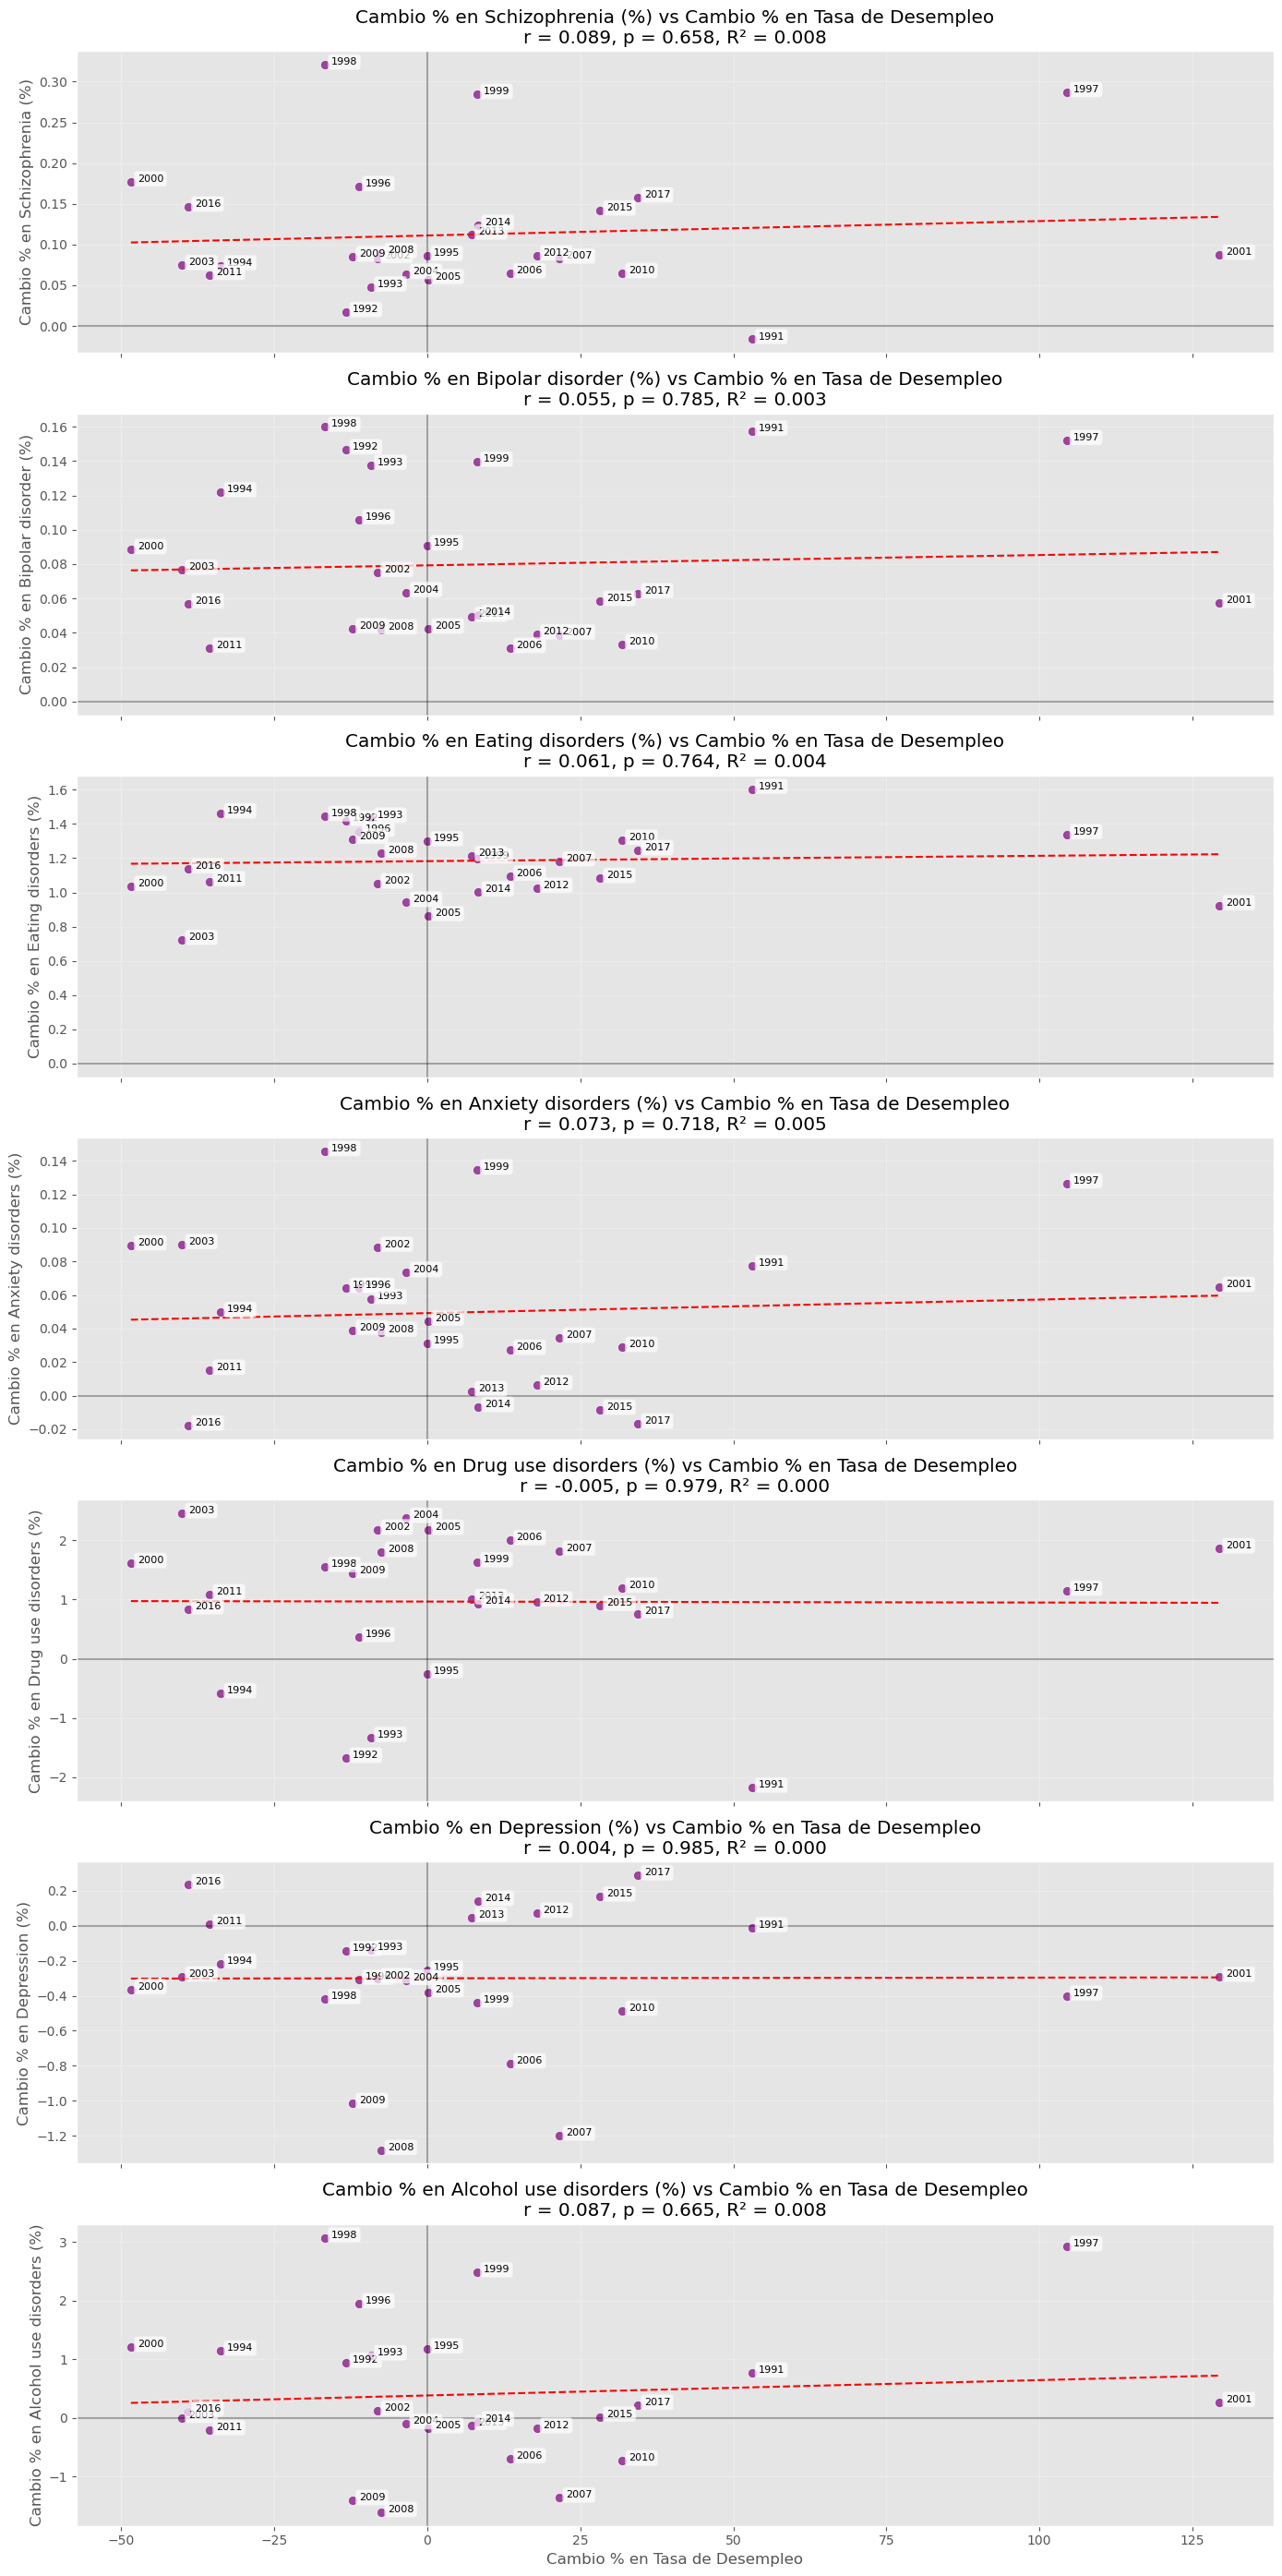

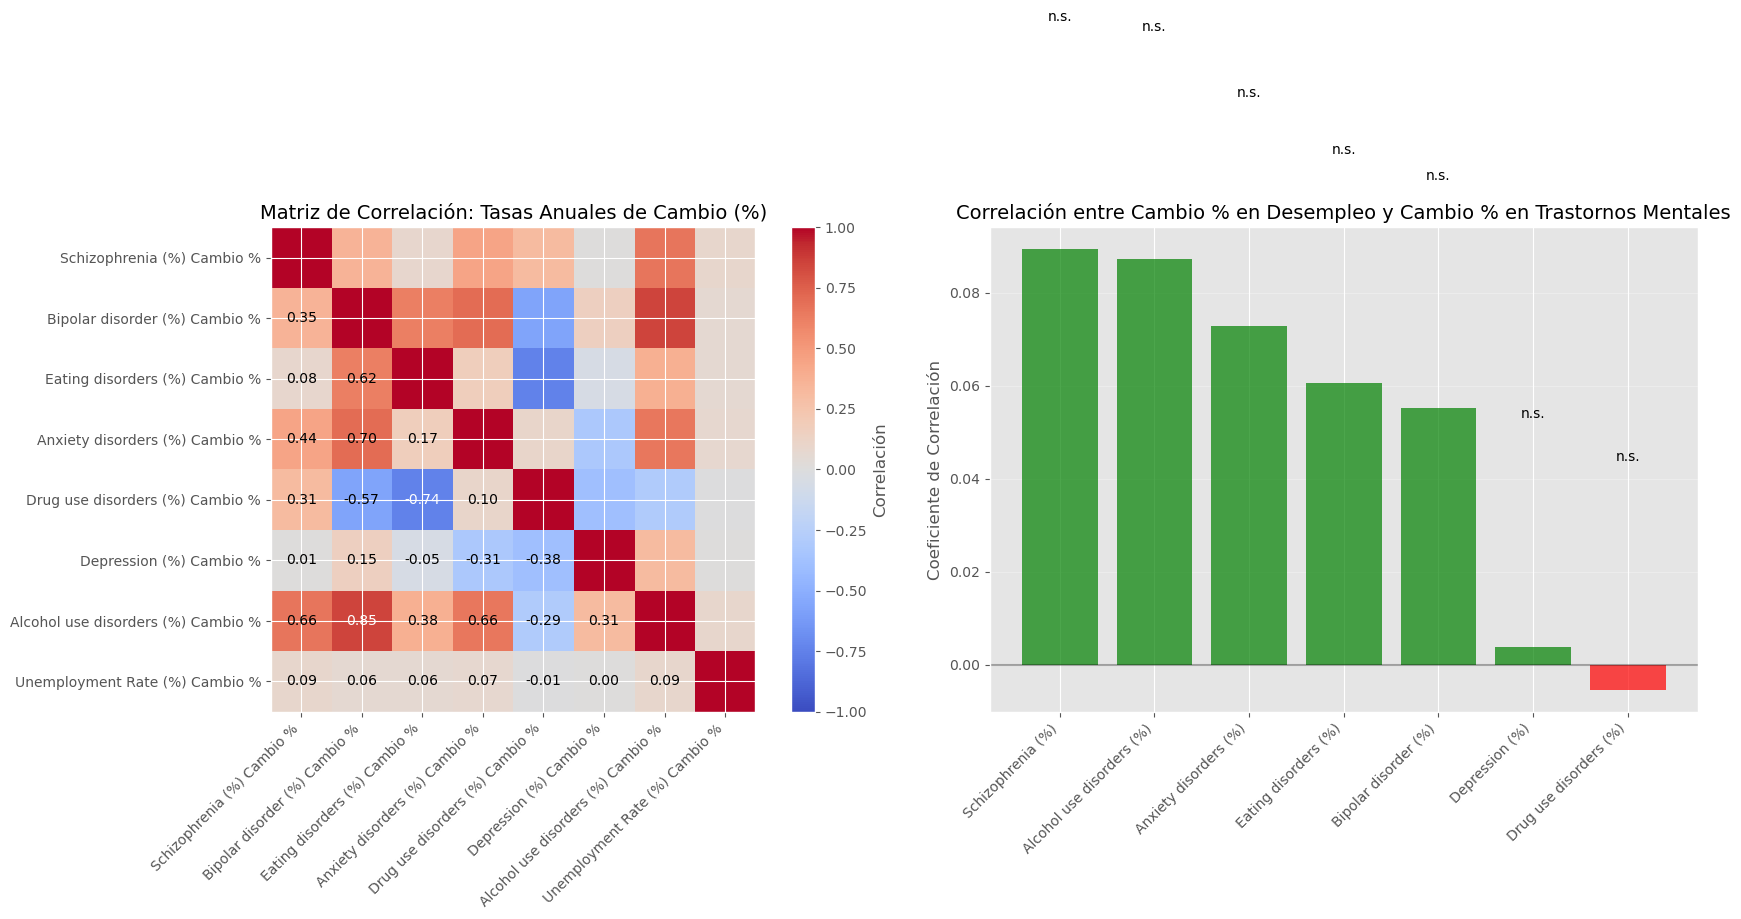

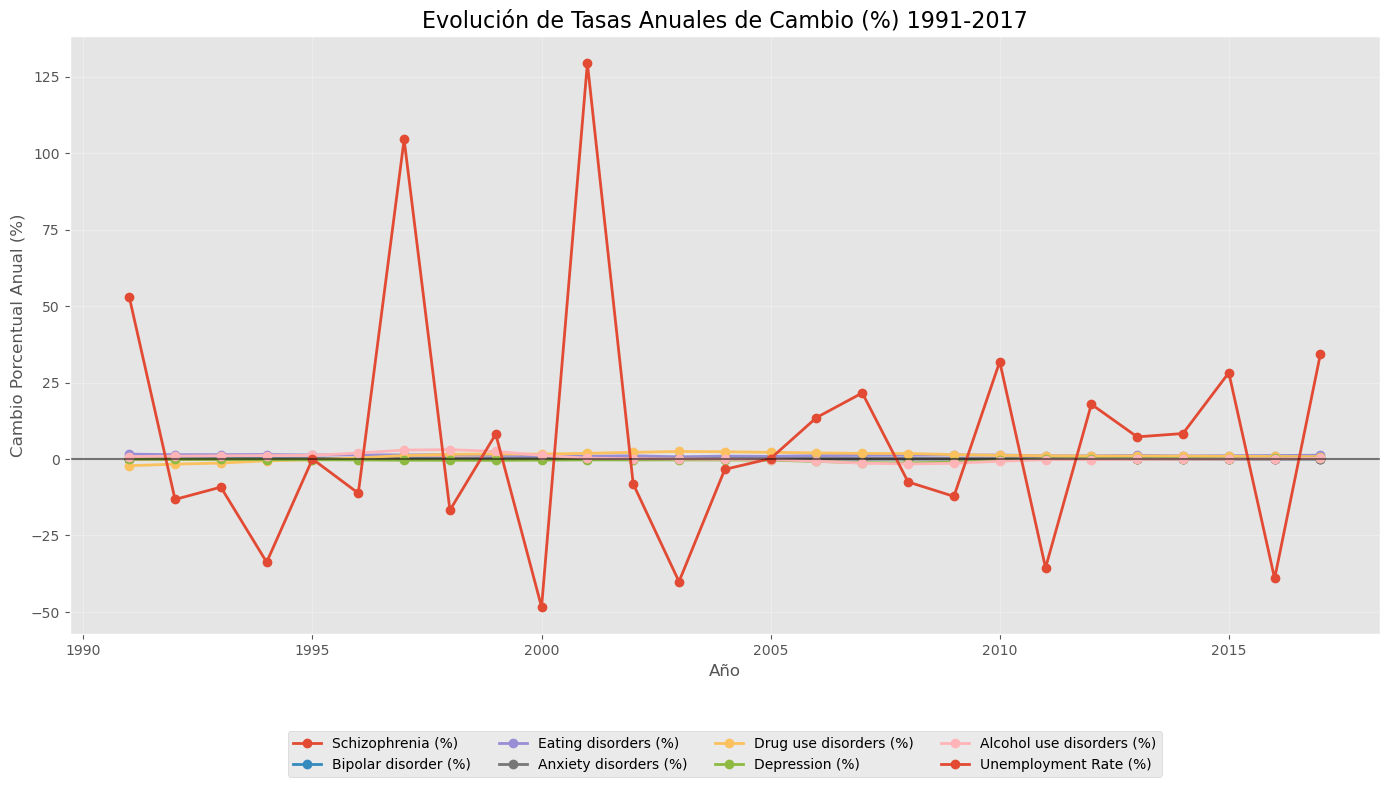

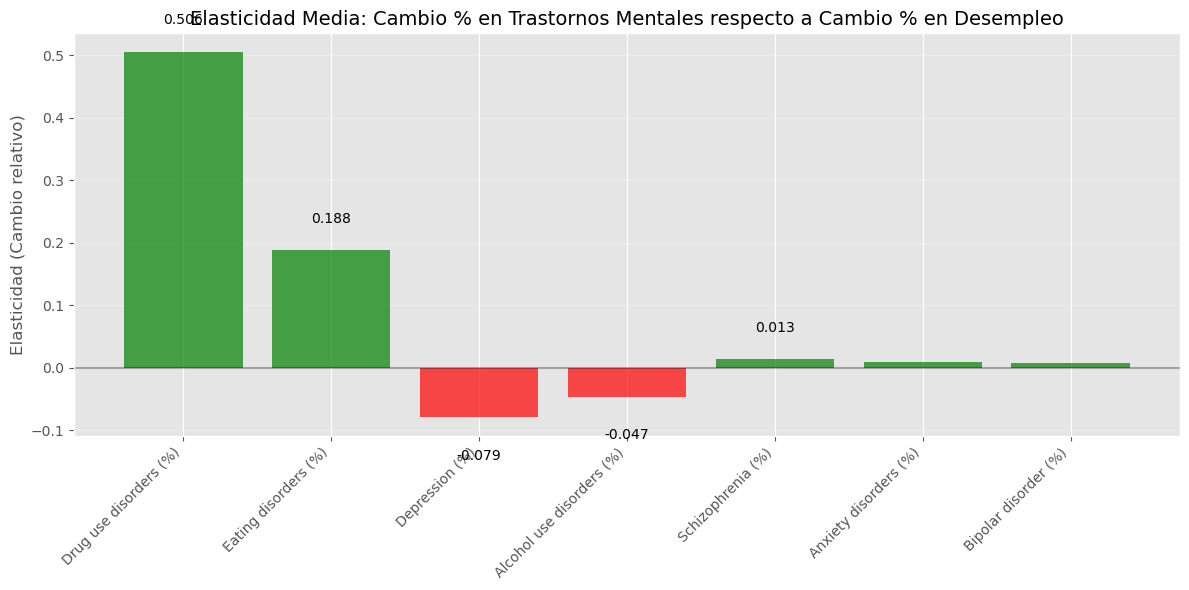

Correlaciones entre tasas anuales de cambio:
Schizophrenia (%): r = 0.089, p = 0.658 - No significativo
Bipolar disorder (%): r = 0.055, p = 0.785 - No significativo
Eating disorders (%): r = 0.061, p = 0.764 - No significativo
Anxiety disorders (%): r = 0.073, p = 0.718 - No significativo
Drug use disorders (%): r = -0.005, p = 0.979 - No significativo
Depression (%): r = 0.004, p = 0.985 - No significativo
Alcohol use disorders (%): r = 0.087, p = 0.665 - No significativo

Elasticidades medias:
Drug use disorders (%): 0.506
Eating disorders (%): 0.188
Depression (%): -0.079
Alcohol use disorders (%): -0.047
Schizophrenia (%): 0.013
Anxiety disorders (%): 0.009
Bipolar disorder (%): 0.008


In [11]:
# Cruce de tasas anuales de cambio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Chile_Mental_Disorder_Empleo.csv')

mental_disorders = [col for col in df.columns if '%' in col and col != 'Unemployment Rate (%)']
all_variables = mental_disorders + ['Unemployment Rate (%)']

df_change = pd.DataFrame(index=df['Year'].iloc[1:].values)

for col in all_variables:
    yearly_pct_change = []
    for i in range(1, len(df)):
        pct_change = ((df[col].iloc[i] - df[col].iloc[i-1]) / df[col].iloc[i-1]) * 100
        yearly_pct_change.append(pct_change)
    df_change[f"{col} Cambio %"] = yearly_pct_change

correlations = {}
p_values = {}

for disorder in mental_disorders:
    disorder_change = f"{disorder} Cambio %"
    unemployment_change = "Unemployment Rate (%) Cambio %"
    
    corr, p_value = stats.pearsonr(df_change[disorder_change], df_change[unemployment_change])
    correlations[disorder] = corr
    p_values[disorder] = p_value

fig, axes = plt.subplots(len(mental_disorders), 1, figsize=(14, 4*len(mental_disorders)), sharex=True)

for i, disorder in enumerate(mental_disorders):
    disorder_change = f"{disorder} Cambio %"
    unemployment_change = "Unemployment Rate (%) Cambio %"
    
    axes[i].scatter(df_change[unemployment_change], df_change[disorder_change], color='purple', alpha=0.7)
    
    m, b = np.polyfit(df_change[unemployment_change], df_change[disorder_change], 1)
    x_range = np.linspace(df_change[unemployment_change].min(), df_change[unemployment_change].max(), 100)
    axes[i].plot(x_range, m*x_range + b, color='red', linestyle='--')
    
    r_squared = correlations[disorder]**2
    
    axes[i].set_title(f'Cambio % en {disorder} vs Cambio % en Tasa de Desempleo\nr = {correlations[disorder]:.3f}, p = {p_values[disorder]:.3f}, R² = {r_squared:.3f}')
    axes[i].set_ylabel(f'Cambio % en {disorder}')
    axes[i].grid(True, alpha=0.3)
    
    for j, year in enumerate(df_change.index):
        axes[i].annotate(str(int(year)), 
                       (df_change[unemployment_change].iloc[j], df_change[disorder_change].iloc[j]),
                       xytext=(5, 0), textcoords='offset points', fontsize=8,
                       bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
    
    axes[i].axhline(y=0, color='black', alpha=0.3, linestyle='-')
    axes[i].axvline(x=0, color='black', alpha=0.3, linestyle='-')

plt.xlabel('Cambio % en Tasa de Desempleo')
plt.tight_layout()
plt.savefig('cruce_tasas_anuales_cambio.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(18, 10))
gs = plt.GridSpec(1, 2, width_ratios=[1, 1], figure=fig)

ax_heatmap = plt.subplot(gs[0, 0])
correlation_matrix = df_change.corr()

im = ax_heatmap.imshow(correlation_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, ax=ax_heatmap, label='Correlación')

ax_heatmap.set_xticks(np.arange(len(correlation_matrix.columns)))
ax_heatmap.set_yticks(np.arange(len(correlation_matrix.columns)))
ax_heatmap.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax_heatmap.set_yticklabels(correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i <= j:  # Solo mostrar la mitad inferior de la matriz
            continue
        text = ax_heatmap.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                           ha="center", va="center", color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white")

ax_heatmap.set_title('Matriz de Correlación: Tasas Anuales de Cambio (%)', fontsize=14)

ax_bar = plt.subplot(gs[0, 1])
corr_with_unemployment = correlation_matrix["Unemployment Rate (%) Cambio %"].drop("Unemployment Rate (%) Cambio %")
corr_with_unemployment = corr_with_unemployment.sort_values(ascending=False)

colors = ['green' if x > 0 else 'red' for x in corr_with_unemployment]
bars = ax_bar.bar(range(len(corr_with_unemployment)), corr_with_unemployment.values, color=colors, alpha=0.7)

sig_level = 0.05
for i, label in enumerate(corr_with_unemployment.index):
    disorder = label.replace(' Cambio %', '')
    p_value = p_values.get(disorder, 1.0)
    if p_value < sig_level:
        ax_bar.text(i, corr_with_unemployment.iloc[i] + 0.05, '*', 
                  ha='center', va='center', fontsize=20)
    else:
        ax_bar.text(i, corr_with_unemployment.iloc[i] + 0.05, 'n.s.', 
                  ha='center', va='center', fontsize=10)

ax_bar.set_title('Correlación entre Cambio % en Desempleo y Cambio % en Trastornos Mentales', fontsize=14)
ax_bar.set_ylabel('Coeficiente de Correlación', fontsize=12)
ax_bar.set_xticks(range(len(corr_with_unemployment)))
ax_bar.set_xticklabels([x.replace(' Cambio %', '') for x in corr_with_unemployment.index], rotation=45, ha='right')
ax_bar.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax_bar.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('correlacion_tasas_cambio.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))

for col in df_change.columns:
    ax.plot(df_change.index, df_change[col], marker='o', linewidth=2, label=col.replace(' Cambio %', ''))

ax.set_title('Evolución de Tasas Anuales de Cambio (%) 1991-2017', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Cambio Porcentual Anual (%)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.tight_layout()
plt.savefig('evolucion_tasas_cambio.png', dpi=300, bbox_inches='tight')
plt.show()

elasticities = {}
for disorder in mental_disorders:
    disorder_change = f"{disorder} Cambio %"
    unemployment_change = "Unemployment Rate (%) Cambio %"
    
    non_zero_indexes = (df_change[unemployment_change] != 0)
    if non_zero_indexes.sum() > 0:
        elasticity = (df_change[disorder_change][non_zero_indexes] / df_change[unemployment_change][non_zero_indexes]).mean()
        elasticities[disorder] = elasticity

sorted_elasticities = {k: v for k, v in sorted(elasticities.items(), key=lambda item: abs(item[1]), reverse=True)}

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in sorted_elasticities.values()]
bars = ax.bar(range(len(sorted_elasticities)), list(sorted_elasticities.values()), color=colors, alpha=0.7)

ax.set_title('Elasticidad Media: Cambio % en Trastornos Mentales respecto a Cambio % en Desempleo', fontsize=14)
ax.set_ylabel('Elasticidad (Cambio relativo)', fontsize=12)
ax.set_xticks(range(len(sorted_elasticities)))
ax.set_xticklabels(list(sorted_elasticities.keys()), rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(sorted_elasticities.values()):
    if abs(v) > 0.01:
        ax.text(i, v + (0.05 if v > 0 else -0.05), f'{v:.3f}', 
              ha='center', va='center' if v > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.savefig('elasticidad_trastornos_desempleo.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlaciones entre tasas anuales de cambio:")
for disorder in mental_disorders:
    corr = correlations[disorder]
    p_val = p_values[disorder]
    significance = "* Significativo" if p_val < 0.05 else "No significativo"
    print(f"{disorder}: r = {corr:.3f}, p = {p_val:.3f} - {significance}")

print("\nElasticidades medias:")
for disorder, elasticity in sorted_elasticities.items():
    print(f"{disorder}: {elasticity:.3f}")

# Interpretación del Análisis de Cruce de Tasas Anuales de Cambio: Trastornos Mentales y Desempleo en Chile (1990-2017)

## 1. Análisis de Correlaciones entre Tasas de Cambio (Imágenes 1 y 2)

### Correlaciones individuales
Los gráficos de dispersión y los valores de correlación muestran:

- Todas las correlaciones entre las tasas de cambio del desempleo y las tasas de cambio de los trastornos mentales son extremadamente débiles (entre -0.005 y 0.089)
- Ninguna correlación es estadísticamente significativa (todos los valores p > 0.65)
- Los valores de R² son prácticamente nulos (todos ≤ 0.008), indicando que las variaciones en la tasa de cambio del desempleo explican menos del 1% de la varianza en las tasas de cambio de cualquier trastorno mental

### Matriz de correlación (Imagen 2, panel izquierdo)
La matriz revela:

- **Correlaciones entre trastornos**: Existen correlaciones moderadas a fuertes entre las tasas de cambio de diversos trastornos mentales (por ejemplo, r = 0.70 entre trastornos de ansiedad y trastorno bipolar)
- **Independencia del desempleo**: La última fila muestra que los cambios en el desempleo no están correlacionados con cambios en ningún trastorno mental (valores entre -0.01 y 0.09)
- **Agrupaciones de trastornos**: Se pueden identificar grupos de trastornos que tienden a cambiar juntos (por ejemplo, esquizofrenia, trastorno bipolar y trastornos por uso de alcohol)

## 2. Evolución Temporal de las Tasas de Cambio (Imagen 3)

El gráfico de evolución muestra:

- **Alta volatilidad del desempleo**: La tasa de cambio anual del desempleo (línea roja) muestra fluctuaciones extremas, con variaciones que oscilan entre aproximadamente -50% y +125%
- **Estabilidad en los trastornos mentales**: Las tasas de cambio de todos los trastornos mentales son notablemente estables, manteniéndose cerca de cero durante todo el período
- **Magnitud de diferencia**: Existe una diferencia de escala dramática, donde los cambios en trastornos mentales rara vez superan el ±2%, mientras que el desempleo fluctúa en rangos de hasta ±100%
- **No correspondencia de picos**: Los momentos de mayor cambio en el desempleo (2000, 2002) no se corresponden con alteraciones visibles en las tendencias de trastornos mentales

## 3. Elasticidades Medias (Imágenes 4 y 5)

La elasticidad, que mide la sensibilidad relativa de los trastornos mentales ante cambios en el desempleo, muestra:

- **Trastornos por uso de drogas**: Presenta la mayor elasticidad positiva (0.506), indicando que, en promedio, un aumento del 1% en el desempleo está asociado con un aumento del 0.506% en estos trastornos
- **Trastornos alimentarios**: Segunda mayor elasticidad positiva (0.188)
- **Depresión y trastornos por uso de alcohol**: Muestran elasticidades negativas (-0.079 y -0.047 respectivamente), sugiriendo una tendencia débil a disminuir cuando el desempleo aumenta
- **Esquizofrenia, trastornos de ansiedad y trastorno bipolar**: Elasticidades cercanas a cero (entre 0.008 y 0.013), indicando prácticamente ninguna respuesta a cambios en el desempleo

## 4. Interpretación Global

1. **Independencia de las tasas de cambio a corto plazo**: Los análisis demuestran que los cambios a corto plazo (año a año) en la tasa de desempleo no se relacionan con cambios contemporáneos en la prevalencia de trastornos mentales. Esto complementa y refuerza los hallazgos previos sobre la independencia de las tendencias a largo plazo.

2. **Diferencial de volatilidad**: La extrema diferencia en volatilidad entre las tasas de cambio del desempleo y de los trastornos mentales sugiere que operan bajo dinámicas fundamentalmente diferentes. Mientras el desempleo responde rápidamente a ciclos económicos, los trastornos mentales siguen tendencias mucho más estables dictadas por factores estructurales a largo plazo.

3. **Elasticidades diferenciales**: Aunque ninguna relación es estadísticamente significativa, las diferencias en elasticidades sugieren que los trastornos tienen diferentes sensibilidades potenciales a factores económicos:
   - Los trastornos por uso de drogas y alimentarios muestran la mayor sensibilidad potencial
   - La depresión y los trastornos por uso de alcohol parecen moverse en dirección opuesta al desempleo
   - Los trastornos con componentes más biológicos (esquizofrenia, bipolar) muestran la menor respuesta

4. **Correlaciones entre trastornos**: La matriz de correlación sugiere que existen patrones comunes de cambio entre ciertos grupos de trastornos mentales, lo que podría indicar factores subyacentes compartidos que influyen en su prevalencia, pero estos factores no parecen estar relacionados con las fluctuaciones económicas.

## 5. Conclusiones Específicas

1. **A corto plazo**: Los cambios anuales en el desempleo no tienen un impacto detectable en los cambios anuales en la prevalencia de trastornos mentales en Chile.

2. **Mecanismos de estabilidad**: La notable estabilidad en las tasas de cambio de trastornos mentales, incluso durante períodos de alta volatilidad económica, sugiere la presencia de mecanismos estabilizadores en la sociedad chilena (sistemas de salud, redes de apoyo, políticas sociales).

3. **Relevancia para políticas públicas**: Las políticas de salud mental no deberían centrarse en respuestas reactivas a ciclos económicos a corto plazo, sino en abordar factores estructurales que afectan las tendencias a más largo plazo.

4. **Limitaciones metodológicas**: El análisis de tasas de cambio a nivel poblacional podría no capturar efectos a nivel individual o subgrupos vulnerables específicos que podrían ser más sensibles a cambios económicos.

Este análisis de cruce de tasas anuales de cambio proporciona una perspectiva adicional y más refinada que confirma de manera robusta la conclusión general: en Chile, durante el período 1990-2017, la prevalencia de trastornos mentales evoluciona de manera independiente de las fluctuaciones del desempleo, tanto a corto como a largo plazo.

# Conclusión General: Relación entre Tasa de Desempleo y Prevalencia de Enfermedades Mentales en Chile (1990-2017)

## Hipótesis Inicial

La investigación partió de la hipótesis de que podría existir una relación estadísticamente significativa entre la tasa de desempleo y la prevalencia de enfermedades mentales en Chile durante el período 1990-2017, basándose en literatura internacional que sugiere que el desempleo y la inseguridad económica pueden impactar negativamente en la salud mental poblacional.

## Síntesis de Hallazgos

A través de múltiples metodologías de análisis estadístico y visualización de datos, la investigación ha generado un conjunto consistente de evidencias que conducen a una conclusión robusta:

1. **Ausencia de correlaciones significativas**: Ninguno de los trastornos mentales estudiados mostró correlaciones estadísticamente significativas con la tasa de desempleo. Los coeficientes de correlación oscilaron entre -0.180 y 0.158, con valores p considerablemente superiores al umbral de significancia estadística (todos p > 0.35).

2. **Independencia de tendencias a largo plazo**: Las series temporales revelan patrones de evolución fundamentalmente diferentes: mientras el desempleo fluctuó considerablemente con varios picos y valles pronunciados (rango de 5.1% a 11.8%), los trastornos mentales siguieron tendencias graduales y sostenidas, aparentemente impermeables a los ciclos económicos.

3. **Diferencias en variabilidad**: El desempleo mostró una variabilidad relativa (CV=24.21%) sustancialmente mayor que cualquier trastorno mental (máximo CV=11.53% para trastornos por uso de drogas), sugiriendo que operan bajo dinámicas temporales distintas.

4. **Ausencia de efectos retardados**: El análisis con desfase temporal descartó la posibilidad de que los efectos del desempleo pudieran manifestarse con retraso en la prevalencia de trastornos mentales.

5. **Independencia en tasas de cambio**: El cruce de tasas anuales de cambio confirmó que incluso los cambios a corto plazo en el desempleo no están relacionados con cambios en la prevalencia de trastornos mentales, con correlaciones extremadamente débiles (entre -0.005 y 0.089) y no significativas (todos p > 0.65).

6. **Elasticidades heterogéneas pero no significativas**: Aunque algunos trastornos mostraron mayor sensibilidad potencial ante cambios en el desempleo (elasticidades de 0.506 para trastornos por uso de drogas y 0.188 para trastornos alimentarios), ninguna de estas relaciones alcanzó significancia estadística.

7. **Comparaciones pre/post crisis**: Los análisis específicos de períodos antes y después de crisis económicas, así como entre épocas de alto y bajo desempleo, no revelaron diferencias significativas en la prevalencia de trastornos mentales.

## Conclusión Final

**Los datos analizados proporcionan fuerte evidencia para rechazar la hipótesis inicial de una relación estadísticamente significativa entre la tasa de desempleo y la prevalencia de enfermedades mentales en Chile durante el período 1990-2017.**

La salud mental poblacional en Chile durante las casi tres décadas estudiadas parece haber evolucionado siguiendo patrones independientes de las fluctuaciones económicas representadas por la tasa de desempleo. Esta independencia se mantiene tanto en las tendencias a largo plazo como en los cambios a corto plazo, y persiste incluso cuando se consideran posibles efectos retardados o análisis específicos por períodos.

## Explicaciones Potenciales

Varias explicaciones podrían dar cuenta de estos hallazgos:

1. **Factores protectores específicos**: Chile podría contar con sistemas de protección social, redes de apoyo familiar, o políticas públicas que mitigan efectivamente el impacto del desempleo sobre la salud mental.

2. **Determinantes alternativos**: La prevalencia de trastornos mentales podría estar determinada principalmente por factores estructurales distintos a las fluctuaciones económicas, como tendencias demográficas, cambios en sistemas de diagnóstico o registro, acceso a servicios de salud, o factores socioculturales.

3. **Limitaciones de datos agregados**: Los datos a nivel país podrían enmascarar efectos significativos en subgrupos poblacionales específicos o a nivel individual, diluyendo relaciones que podrían ser evidentes en análisis más granulares.

4. **Naturaleza de los trastornos**: Los trastornos con componentes más biológicos (como esquizofrenia o trastorno bipolar) muestran la mayor estabilidad temporal, mientras que aquellos más susceptibles a influencias ambientales (como trastornos por uso de drogas o alimentarios) presentan mayor variabilidad, aunque sin correlación significativa con el desempleo.

## Implicaciones

Estos hallazgos tienen importantes implicaciones:

1. **Para políticas públicas**: Las estrategias de salud mental en Chile deberían enfocarse en factores estructurales a largo plazo, más que en respuestas coyunturales a crisis económicas.

2. **Para la investigación**: Se justifica explorar con mayor profundidad los determinantes alternativos de la salud mental poblacional y los factores protectores específicos que podrían estar operando en el contexto chileno.

3. **Para la práctica clínica**: La comprensión de que los trastornos mentales siguen tendencias propias, relativamente independientes de ciclos económicos, puede informar mejor las proyecciones de necesidades de servicios de salud mental.

## Limitaciones y Direcciones Futuras

Esta investigación presenta algunas limitaciones que sugieren direcciones para estudios futuros:

1. **Granularidad de datos**: Análisis a nivel de subgrupos específicos (por género, edad, nivel socioeconómico) podrían revelar patrones no detectables a nivel poblacional.

2. **Indicadores económicos alternativos**: Otros indicadores económicos además del desempleo (como desigualdad, precariedad laboral, o inflación) podrían tener relaciones más significativas con la salud mental.

3. **Metodologías complementarias**: Estudios longitudinales a nivel individual y métodos mixtos que incorporen datos cualitativos podrían proporcionar una comprensión más rica y matizada de las complejas interacciones entre economía y salud mental.

En síntesis, esta investigación contribuye a comprender mejor la dinámica de la salud mental poblacional en Chile, destacando su aparente resiliencia ante fluctuaciones económicas y señalando la necesidad de explorar determinantes alternativos para informar políticas públicas más efectivas.